# Phase 2 Movie Project 
* Student Name: Evan Callaghan
* Student Pace: Part Time
* Scheduled Project Review Date/Time: 
* Instructor Name: Mark Barbour

## Introduction
Artificial Intelligence (AI), graphics cards, cloud computing, semiconductor technology, and advanced computer software have become a booming industry as we head into 2025. Not only are these products incredibly useful for modern business intelligence, state-of-the-art research capability, and commercial viability, they have led to a booming speculative investment among both private and public stockholders. 
Our technology company, QualVidia Micro Devices (QMD), has seen its' stock price surge 5,000% over the last 10 years. This has not only led to the opportunity to acquire our competitors and manufacturing operations to create a more vertically integrated structure, it has led to increased visibility of our product and therefore, exponentially increasing sales. With the success of our products and the exceptional financial management by our team, we have substantial equity and cash on hand to expand our business operations. 
On top of our technology, we have broadened to include entertainment solutions, such as:
* Smart TV's 
* Gaming Computers
* Gaming Console
* Smart Kitchen Appliances, Toilets, and Air Conditioning
* Smart Phone
* Smart Eyewear 

As QMD continues to grow, we have decided to add to our entertainment services and create a movie studio to compete with Amazon Prime Video, Disney+, Netflix, and Apple TV+. The movie production studio division of Qualvidia Micro Devices will be called QMD+ Studios. 
Our data science team has been tasked with analyzing the current trends in box office performance and providing data-driven insights on how to create profitable and commercially successful films.


## The Data
The data we are using to analyze the production direction of QMD+ Studios is sourced from the following:
* **Box Office Mojo**
    * A website that tracks box office revenue and provides detailed information about film performance.
* **IMDb**
    * IMBD or Internet Movie Database, provides film data such as cast, release dates, and ratings.
* **Rotten Tomatoes**
    * Aggregates movie reviews from both critics and audiences to provide an overall assessment of a film's quality.
* **TheMovieDB**
    * Community driven database that provides movie information and an API that developers can use to access and integrate movie data into their own applications and websites.
* **TheNumbers**
    * A website that provides detailed information and analysis on box office performance and financial aspects of movies.
 

## Analysis
Below, we provide a technical explanation of how we arrived at our recommendations, including:
* What data we used and why
* How we cleaned and handled the data
* The steps we took to reach our conclusions
* Mathematical and visual explanations of our results

## Importing Libraries and Modules for Data Processing

In [1]:
import zipfile # Library to handle and extract ZIP files.

import pandas as pd # For data manipulation and analysis, 
                    # using pd as an alias.

import gzip # To read and write compressed .gz files.

import sqlite3 # For working with SQLite databases 
               # directly from Python.
    
import os # To interact with the operating system, handling file 
          # and directory operations. 

## Loading CSV and TSV Data into Pandas DataFrames
Use the Pandas method 'pd.read_csv()' to load the csv and tsv files into Pandas DataFrames.

In [2]:
# Reading CSV and TSV files into pandas DataFrames

# Loading box office gross data from a compressed CSV file
bom_movie_df = pd.read_csv('../Movie-Data/bom.movie_gross.csv.gz')

# Loading movie information from a compressed TSV file, 
# specifying tab as the separator
movie_info_df = pd.read_csv('../Movie-Data/rt.movie_info.tsv.gz', sep='\t')

# Loading movie reviews from a compressed TSV file
# with Latin-1 encoding
movie_reviews_df = pd.read_csv('../Movie-Data/rt.reviews.tsv.gz', sep='\t', encoding='latin1')

# Loading TMDb movie data from a compressed CSV file
tmdb_movies_df = pd.read_csv('../Movie-Data/tmdb.movies.csv.gz')

# Loading movie budgets data from a compressed CSV file
movie_budgets_df = pd.read_csv('../Movie-Data/tn.movie_budgets.csv.gz')


## Displaying the Data for Preview
Now that we have loaded the data into Pandas DataFrames, we preview each of these DataFrames using the '.head()' method in Pandas to return the first few rows of our DataFrame. This allows us to make sure the data loaded correctly, and to see the columns available for data processing. 

In [3]:
# Displaying the first few rows of the box office gross
# DataFrame to get an overview of the data
bom_movie_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
# Displaying the first few rows of the movie information
# DataFrame to get an overview of the data
movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [5]:
# Displaying the first few rows of the movie reviews
# DataFrame to get an overview of the data
movie_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [6]:
# Displaying the first few rows of the movie data
# DataFrame to get an overview of the data
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [7]:
# Displaying the first few rows of the movie budgets
# DataFrame to get an overview of the data
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Unzip and Load SQLite Data
One of our data files called 'im.db.zip' is a ZIP file containing a SQLite database. In order to use this data, we extracted the contents of the ZIP file to our desired file path and created a connection to the SQLite database, using 'conn = sqlite3.connect().' 

Now that our  SQLite database is connected, we are able to query it to extract and analyze the data it contains. 

In [8]:
# Extracting the SQLite database from the zipfile im.db.zip

# Define paths
data_folder = '/Users/evancallaghan/flatiron_ds/phase_2/Phase2-Project-Movie-Studio/Movie-Data/'
zip_file_path = os.path.join(data_folder, 'im.db.zip')
extract_folder = data_folder  # Extract to the same folder as the zip file

# Open and extract the SQLite database file from the zip archive
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List files in the ZIP archive
    file_list = zip_ref.namelist()
    # Extract the first file (assumed to be the database)
    zip_ref.extract(file_list[0], path=extract_folder)
    extracted_db_path = os.path.join(extract_folder, file_list[0])

# Check if the file was extracted successfully
if os.path.exists(extracted_db_path):
    print(f"SQLite database extracted successfully to: {extracted_db_path}")
else:
    print("Extraction failed or file not found.")
    
    
# Path to the extracted SQLite database file
extracted_db_path = '/Users/evancallaghan/flatiron_ds/phase_2/Phase2-Project-Movie-Studio/Movie-Data/im.db'

# Connect to the SQLite database
conn = sqlite3.connect('/Users/evancallaghan/flatiron_ds/phase_2/Phase2-Project-Movie-Studio/Movie-Data/im.db')



SQLite database extracted successfully to: /Users/evancallaghan/flatiron_ds/phase_2/Phase2-Project-Movie-Studio/Movie-Data/im.db


## Query the names of all tables in the SQLite Database
In order to analyze this SQLite Database, we write a query to retrieve the names of all tables inside our database. Later, we will query these tables individually to preview the data and see how the tables connect. 

In [9]:
# Querying the names of all table in the SQLite database

# SQL query to retreive table names from the SQLite database schema
q = """SELECT name FROM sqlite_master WHERE type='table';"""
pd.read_sql(q, conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


## Analysis for Recommendation #1: Top 5 Most Profitable Genres for Domestic and Worldwide Films
The following analysis shows our calculation of the top five most profitable genres in both domestic and international films. In order to calculate this, we need a dataframe that contains columns for the following items:
* Movie Title
* Genre(s)
* Domestic Net Profit
* Worldwide Net Profit

When we examine our DataFrames, none of the DataFrames we are given contain all this information packaged together. To solve this, we are going to have to find the DataFrames that contain these columns and merge them. 

If we look at our tmdb_movies_df DataFrame, it contains a column for the movie title called 'title' and contains a column for the genres of each movie called 'genre_ids'. Looking elsewhere at our 'movie_budgets_df' DataFrame, it contains a domestic gross profit column called 'domestic_gross', a column for worldwide gross profit called 'worldwide_gross', and a production budget column called 'production_budget'. Subtracting production budget from domestic and worldwide gross gives us the domestic net profit. In order to run our calculation to find the most profitable genres, we are going to have to merge these two DataFrames together into one DataFrame containing these five columns.

Before we merge these DataFrames, we are going to have to clean up some of the data. Although our 'tmdb_movies_df' DataFrame has genre information for each movie, it is in the form of genre ID. A quick Google search shows us that these genre IDs are universal and used this website "https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee" to see genre IDs and their corresponding genre. Using this information, the first step in this process is going to be replacing the genre IDs in the 'genre_ids' column and replacing it with the actual genre name for readability. 

In [10]:
# Displaying the first few rows of the movie budgets
# DataFrame to see what the columns are

tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## Genre Mapping
Through this website "https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee", we found the genre that corresponds with each genre ID. Using this information, we are going to define a dictionary called "genre_mapping" in which the keys are the genre IDs and the values are the corresponding genre names. We're going to use this mapping to replace the genre IDs with the actual genre names. 

In [11]:
# Define your genre mapping dictionary
genre_mapping = {
    28: "Action",
    12: "Adventure",
    16: "Animation",
    35: "Comedy",
    80: "Crime",
    99: "Documentary",
    18: "Drama",
    10751: "Family",
    14: "Fantasy",
    36: "History",
    27: "Horror",
    10402: "Music",
    9648: "Mystery",
    10749: "Romance",
    878: "Science Fiction",
    10770: "TV Movie",
    53: "Thriller",
    10752: "War",
    37: "Western"
}

## Checking Object Type of Genre IDs
When we check the first few values of the 'genre_ids' column inside our 'tmdb_movies_df' DataFrame using the pandas method '.head()', the values look like they have a data structure of integers inside a list. To verify this, we use a nested for-loop to iterate over the values inside our 'genre_ids', as well as the elements contained inside those values, and print out the object type of each value and element. We then store the output of those object types inside a list we initialized called 'genre_type_list.' 

In [12]:
# Displaying the values 'genre_ids' column of the movie 
# budgets DataFrame to see what values look like

tmdb_movies_df['genre_ids'].head()

0        [12, 14, 10751]
1    [14, 12, 16, 10751]
2          [12, 28, 878]
3        [16, 35, 10751]
4          [28, 878, 12]
Name: genre_ids, dtype: object

In [13]:
# Checking the object type of the values in the 'genre_ids' column

# Set variable to first few values from the 'genre_ids' column
genre_id_head = tmdb_movies_df['genre_ids'].head()

# Initialize an empty list to store the types
genre_type_list = []

# Iterate over the values in 'genre_id_head' to determine 
# their types
for genre_id in genre_id_head:
    for genre in genre_id:
        genre_type_list.append(type(genre))

# Print the list of object types
print(genre_type_list)

[<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 's

In [14]:
# Output the first value in the 'genre_ids' column to show 
# it is a string representation of a list, but not an actual list. 

tmdb_movies_df['genre_ids'][0]

'[12, 14, 10751]'

## Converting Genre IDs from Strings to Lists of Integers
The results show that the 'genre_id' values, and elements within those values, are strings. Each value is a string representation of a list, and the elements inside that string representation of a list, are also strings. Checking the first value inside our 'genre_ids' column using 'tmdb_movies_df['genre_ids'][0]' gives us an output of '[12, 14, 10751]'. 

In order to insert our genre mapping and replace the genre IDs with their corresponding genre names, we convert the values inside 'genre_ids' from string representation of lists to actual lists containing integers. Once we have that, we can convert the integers inside the list into our genre mapping. 

To convert our string representation of lists to actual lists, we are going to utilize the AST (Abstract Syntax Tree) module in Python. We use this module because it safely evaluates string representations of Python data structures and converts them into actual Python objects. We declare a function called 'safe_literal_eval(val)' that takes a string ('val') as an input and evaluates it as a Python literal (list, dictionary, etc.). Inside our 'safe_literal_eval(val)' function, we use a try-except block, which allows us to handle errors that may occur during the execution of the code. The 'try:' starts the block where the code might raise an exception and inside here, we use the 'ast.literal_eval()' function from the 'ast' module which evaluates 'val' as a Python literal and if 'val' is a valid string representation of a Python data structure, '.literal_eval()' will successfully convert it to that structure and the converted structure will be returned. The 'except:' block catches the exceptions that may be raised by 'ast.literal_eval.' If the string 'val' does not contain a valid Python literal, the 'ValueError' exception will be raised, and if the syntax inside 'val' is invalid, the 'SyntaxError' exception will be raised. If either of these exceptions are raised, the except block executes and returns an empty list for value, before moving on and evaluating the next value. 

Once this function is declared, we apply it to our 'genre_ids' column using the '.apply()' method in pandas, which is used to apply functions along the axis of a DataFrame or Series. 

Now that we have applied our 'safe_literal_eval(val)' function to our 'genre_ids' column and successfully converted the string representation of lists to actual lists, now we need to convert the strings inside those list to actual integers. To do this, we declare a function called 'convert_genre_ids(genre_ids)' which converts all elements within our column of lists into integers. We then apply this using '.apply()' to our 'genre_ids' column and print out the first few rows of 'genre_id' in order to check our conversion. To further validate this conversion, we check the output of 'tmdb_movies_df['genre_ids'][0] to make sure it is a list and then we run a nested loop over the first few values in the 'genre_ids' column to verify the elements inside those values have been successfully converted to integers. 

In [15]:
# Converting string representations of lists to actual lists 
# of integers for the 'genre_ids' column to map IDs to 
# genre names later

import ast # Importing the ast (Abstract Syntax Trees) library 
           # to parse and analyze Python code.

# Function to safely convert a string representation of a list 
# to an actual list
def safe_literal_eval(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return []

# Apply the safe literal evaluation to convert strings to lists
tmdb_movies_df['genre_ids'] = tmdb_movies_df['genre_ids'].apply(safe_literal_eval)

# Function to convert all elements in the list to integers
def convert_genre_ids(genre_ids):
    return [int(genre) for genre in genre_ids]

# Apply the conversion function
tmdb_movies_df['genre_ids'] = tmdb_movies_df['genre_ids'].apply(convert_genre_ids)

# Check the conversion
print(tmdb_movies_df['genre_ids'].head())


0        [12, 14, 10751]
1    [14, 12, 16, 10751]
2          [12, 28, 878]
3        [16, 35, 10751]
4          [28, 878, 12]
Name: genre_ids, dtype: object


In [16]:
# Output the first value in the 'genre_ids' column to show 
# it is has been successfully converted to a list 
tmdb_movies_df['genre_ids'][0]

[12, 14, 10751]

In [17]:
# Verify that each element in the 'genre_ids' lists is an integer

# Set variable to the first few values values inside 
# of the 'genre_ids' column
genre_ids = tmdb_movies_df['genre_ids'].head()

# Iterate over each list in 'genre_ids' to check the type
# of each genre_id
for genre_id_list in genre_ids:
    for genre_id in genre_id_list:
        print(type(genre_id))

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>


## Mapping Genre IDs to Genre Names
The 'genre_ids' column is now in the proper data structure to perform code to map the genre IDs to  genre names. We copy and paste our 'genre_mapping' dictionary for visibility and set a 'tmdb_movies_df['genre_ids']' as a variable called 'genre_ids'. Then perform a nested for-loop to iterate over the lists and elements inside those lists. Because we are updating specific rows in our DataFrame, we use the Python function 'enumerate()' so we can loop over an iterable while keeping track of the index of the current item. By using this, we get both the index and the value in each iteration of our loop, which allows us to access and modify specific rows in the DataFrame based on their index. In this case, 'i' is the index in the DataFrame and 'genre_id_list' is the list of genre_IDs for the current row. Inside our for loop, we initialize a new list to hold genre names called 'genre_name_list'. For each 'genre_id_list', a new 'genre_name_list' it initialized to store genre names. Nested inside this loop is another loop which iterates over each genre ID in the current 'genre_id_list' and uses the '.get()' method, which retrieves the value associated with a specific key. In this case, 'genre_mapping.get(genre_id)' looks up the value associated with the 'genre_id' (key) in the 'genre_mapping' dictionary. Using an 'if' statement, if a value in our 'genre_mapping' dictionary is associated with 'genre_id' (key), the associated genre name from 'genre_mapping' is appended to the 'genre_name_list'. If 'genre_id' does not match with any of the values inside the 'genre_mapping' dictionary, the original IDs are kept. Every time this nested for-loop completes a loop and exits, we use the '.at' method to update 'genre_ids' column at row with index 'i' and replaces it with the new value 'genre_name_list'. This process loops over every value in 'genre_id' until every value has been mapped and updated. 

Checking our mapping with 'print(tmdb_movies_df['genre_ids'].head())' and 'tmdb_movies_df.head()', we see that our mapping was a success and the genre_IDs have been successfully converted to actual genre names.  

In [18]:
# Define your genre mapping dictionary
genre_mapping = {
    28: "Action",
    12: "Adventure",
    16: "Animation",
    35: "Comedy",
    80: "Crime",
    99: "Documentary",
    18: "Drama",
    10751: "Family",
    14: "Fantasy",
    36: "History",
    27: "Horror",
    10402: "Music",
    9648: "Mystery",
    10749: "Romance",
    878: "Science Fiction",
    10770: "TV Movie",
    53: "Thriller",
    10752: "War",
    37: "Western"
}

# Iterate over genre_ids column and replace integers with genre names
genre_ids = tmdb_movies_df['genre_ids']

for i, genre_id_list in enumerate(genre_ids):
    # Initialize new list to hold genre names
    genre_name_list = []
    for genre_id in genre_id_list:
        # Map each genre ID to its corresponding genre name
        # using the genre_mapping dictionary
        genre_name = genre_mapping.get(genre_id)
        if genre_name:
            # Append the genre name if found in the mapping
            genre_name_list.append(genre_name)
        else:
            # Keep the original ID if not found in the mapping
            genre_name_list.append(genre_id)
    # Update the 'genre_ids' column with the list of genre names
    tmdb_movies_df.at[i, 'genre_ids'] = genre_name_list

# Check the updated DataFrame
print(tmdb_movies_df['genre_ids'].head())


0               [Adventure, Fantasy, Family]
1    [Fantasy, Adventure, Animation, Family]
2       [Adventure, Action, Science Fiction]
3                [Animation, Comedy, Family]
4       [Action, Science Fiction, Adventure]
Name: genre_ids, dtype: object


In [19]:
# Output the first few values in the tmdb_movies_df
# DataFrame to show that our genre_ids have been
# replaced with genre names from our 
# genre_mapping dictionary

tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[Adventure, Fantasy, Family]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[Animation, Comedy, Family]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## Merge Preparation: Match Column Names
Now that we have adjusted our 'genre_ids' column in 'tmdb_movies_df', we need to do some further adjusting on each of our DataFrames before merging. In order to merge the 'tmdb_movies_df' and 'movie_budgets_df' DataFrames, we need to ensure they have a common column. This common column will serve as a key, aligning the data correctly from both DataFrames during the merge process. By matching column names and ensuring they contain corresponding values, we can accurately combine the data and make sure information from both sources relates to the same movie. 

Between 'tmdb_movies_df' and 'movie_budgets_df', both of these DataFrames have a column containing the movie title. In the 'tmdb_movies_df' DataFrame, there are two columns that contain the movie titled called 'original_title' and 'title'. In the 'movie_budgets_df' DataFrame, the column containing the movie title is called 'movie'. In order to merge on this column containing the same values, we need to have their column names match. Because 'original_title' from the 'tmdb_movies_df' might not have been the actual movie title on release date, we are going to use the other movie title column, 'title', and we are going to alter the 'movie' column from the 'movie_budgets_df' DataFrame to be 'title'. This way, both columns containing movie title information will have the same column name. 

To perform this action, we're going to use '.rename()', which is a Pandas method used to rename column labels. 'movie_budgets_df.rename(columns={'movie': 'title'}' converts the column name in the 'movie_budgets_df' DataFrame from 'movie' to 'title'. The 'Inplace=True' argument specifies that the changes should be directly applied to the 'movie_budgets_df' DataFrame without the need to create a new DataFrame. 

In [20]:
# Ouput the first few rows of the movie_budgets_df
# dataframe to see which column contains the names
# of the movie titles

movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [21]:
# Rename the 'movie' column in movie_budgets_df to 'title'
# to match tmdb_movies_df
movie_budgets_df.rename(columns={'movie': 'title'}, inplace=True)

In [22]:
# Display the first few rows of our movie_budgets_df
# DataFrame to show 'movie' column has been renamed
# to 'title' successfully

movie_budgets_df.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Merge Preparation: Strip Whitespace and Convert to Lowercase
When merging, we need to make sure our common column, 'title', is exactly the same for both DataFrames. Any row that is not exactly the same will be excluded in the merge. Because there is a high chance for small grammatical differences throwing the merge off, we are going to maximize the number of rows that match exactly by removing any extra white spaces that might be hidden in the titles and converting all titles to lowercase. We do this because one extra white space added to one movie title and not the other, or one letter capitalized in one movie title and not the other, will disallow that row from being merged. 

To perform this operation, we are going to create a new column in each of our DataFrames called 'clean_title' which are cleaned and standardized versions of the 'title' columns. 'tmdb_movies_df['clean_title']' specifies that we are creating a new column called 'clean_title' in the 'tmdb_movies_df' DataFrame. 'tmdb_movies_df['title']' accesses the 'title' column from the 'tmdb_movies_df' DataFrame. '.str' is an accessor that allows vectorized string operations on pandas Series and the '.strip()' Pandas method removes leading and trailing whitespace from each string in the Series. Adding the '.lower()' Pandas method at the end converts each string in the Series to lowercase. We apply this syntax to both 'tmdb_movie_df' and 'movie_budgets_df'. 

In [24]:
# Strip whitespace and convert to lowercase for both dataframes
tmdb_movies_df['clean_title'] = tmdb_movies_df['title'].str.strip().str.lower()
movie_budgets_df['clean_title'] = movie_budgets_df['title'].str.strip().str.lower()

## Merge DataFrames
The common column 'title' in both DataFrames is now cleaned and standardized and the DataFrames are ready to be merged. To execute this merge, we create a new name for the merged DataFrame, 'merged_df', and use the 'pd.merge()' function to merge two DataFrames based on one or more keys. Inside the 'pd.merge()' function, we specify the DataFrames we are merging, the key (column) we are basing the merge on, and the type of join we are performing. In this case, the two DataFrames are 'tmdb_movies_df' and 'movie_budgets_df', the key we are basing the merge on is our newly standardized movie title column 'cleaned_title', and the type of join we are using is an inner join. We are using an inner join because we only want to include the rows where the 'clean_title' values match in both DataFrames. All in all, we have 'merged_df = pd.merge(tmdb_movies_df, movie_budgets_df, on='clean_title', how='inner').' Once we execute this code, we use '.info()' and 'merged_df.head()' to make sure our merge was successful. 

In [25]:
# Merge the DataFrames on the 'clean_title' column
merged_df = pd.merge(tmdb_movies_df, movie_budgets_df, on='clean_title', how='inner')

# Display info of the merged DataFrame
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2446 entries, 0 to 2445
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2446 non-null   int64  
 1   genre_ids          2446 non-null   object 
 2   id_x               2446 non-null   int64  
 3   original_language  2446 non-null   object 
 4   original_title     2446 non-null   object 
 5   popularity         2446 non-null   float64
 6   release_date_x     2446 non-null   object 
 7   title_x            2446 non-null   object 
 8   vote_average       2446 non-null   float64
 9   vote_count         2446 non-null   int64  
 10  clean_title        2446 non-null   object 
 11  id_y               2446 non-null   int64  
 12  release_date_y     2446 non-null   object 
 13  title_y            2446 non-null   object 
 14  production_budget  2446 non-null   object 
 15  domestic_gross     2446 non-null   object 
 16  worldwide_gross    2446 

In [26]:
# Display the first few rows of the merged_df
# Dataframe to make sure our merge was successful
# and contains the columns necessary for analysis
merged_df.head()

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title_x,vote_average,vote_count,clean_title,id_y,release_date_y,title_y,production_budget,domestic_gross,worldwide_gross
0,1,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,how to train your dragon,30,"Mar 26, 2010",How to Train Your Dragon,"$165,000,000","$217,581,232","$494,870,992"
1,2,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,iron man 2,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"
2,3,"[Animation, Comedy, Family]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,toy story,37,"Nov 22, 1995",Toy Story,"$30,000,000","$191,796,233","$364,545,516"
3,2473,"[Animation, Comedy, Family]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,toy story,37,"Nov 22, 1995",Toy Story,"$30,000,000","$191,796,233","$364,545,516"
4,4,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,inception,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"


## Remove Duplicate Titles
To provide a more accurate assessment of the most profitable movie genres, we need to remove duplicate movie titles so that they are not double counted. Using the .'duplicated()' method provided by the pandas library, we can use it to identify duplicate values within the 'clean_title' column of our merged_df DataFrame. '.duplicated()' returns a Boolean Series where 'True' indicates that the value is a duplicate and the parameter 'keep' makes sure to mark all duplicates as True, and not just the duplicates after the first occurrence. Printing out the result of 'df[df['title'].duplicated(keep=False)]' shows us there are duplicate titles in our 'title' column.

To drop these duplicates, we use the Pandas method '.drop_duplicates()' to remove duplicate values from a Series. Inside this method, we utilize the parameters 'subset', which specifies the column we are using to identify duplicates, and 'keep', which determines which duplicate to keep. In this case, 'merged_df.drop_duplicates(subset='clean_title', keep='first').' This means we are dropping duplicates from the 'clean_title' column inside our 'merged_df' dataframe and dropping all duplicate titles except for the first occurrence. 

In [27]:
duplicates = merged_df[merged_df['clean_title'].duplicated(keep=False)]

print(duplicates)

      Unnamed: 0                     genre_ids    id_x original_language  \
2              3   [Animation, Comedy, Family]     862                en   
3           2473   [Animation, Comedy, Family]     862                en   
10            10   [Animation, Comedy, Family]     863                en   
11          2477   [Animation, Comedy, Family]     863                en   
12            11  [Family, Fantasy, Adventure]   12155                en   
...          ...                           ...     ...               ...   
2438       26040                            []  509314                en   
2439       26061            [Animation, Drama]  562705                fr   
2440       26211                    [Thriller]  565736                en   
2441       26323                            []  509316                en   
2442       26425                       [Music]  509306                en   

           original_title  popularity release_date_x              title_x  \
2         

In [28]:
# Remove duplicate titles based on 'clean_title', keeping the 
# first occurance only
merged_df = merged_df.drop_duplicates(subset = 'clean_title', keep='first')


## Filter Data for Recent Movies (Last 10 Years)
Since we only want to analyze recent movie trends, in order to more accurately predict what type of movie will do well in the box office today, we're going to filter our data to only include movies released in the last 10 years. In our 'merged_df' DataFrame, we have a column called 'release_date_x' which is good because it not only gives us the movie release date, but it is already in 'datetime' format, which is a format Python provides that allows us to handle and manipulate date and time information. In this case, we can easily filter out all dates except for the last 10 years of data. Since this data ends in 2019, we are going to filter out all movie releases prior to January 1st 2009. All we have to do is access the column we are filtering using 'merged_df[merged_df['release_date_x']]' and use the comparison operation '>= "2009-01-01" ' and we will filter out all rows in our DataFrame where the 'release_date_x' date is prior to January 1st 2009, giving us only the last 10 years of movie data.  

In [29]:
# Filter DataFrame to only include movies from the last
# 10 years of the data (2019 is final year included in data)

merged_df = merged_df[merged_df['release_date_x'] >= '2009-01-01']
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1918 entries, 0 to 2445
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1918 non-null   int64  
 1   genre_ids          1918 non-null   object 
 2   id_x               1918 non-null   int64  
 3   original_language  1918 non-null   object 
 4   original_title     1918 non-null   object 
 5   popularity         1918 non-null   float64
 6   release_date_x     1918 non-null   object 
 7   title_x            1918 non-null   object 
 8   vote_average       1918 non-null   float64
 9   vote_count         1918 non-null   int64  
 10  clean_title        1918 non-null   object 
 11  id_y               1918 non-null   int64  
 12  release_date_y     1918 non-null   object 
 13  title_y            1918 non-null   object 
 14  production_budget  1918 non-null   object 
 15  domestic_gross     1918 non-null   object 
 16  worldwide_gross    1918 non-n

## Net Profit: Convert from Currency Format to Integers
To carry out our calculation to determine the most profitable domestic and international films, we need to find the net profit of each film. To do this, we're going to make two new columns called 'net_profit_domestic' and 'net_profit_worldwide'. The 'net_profit_domestic' column will contain the net profit calculated by subtracting the production budget of the film from the domestic gross profit. The 'net_profit_worldwide' column will contain the net profit calculated by subtracting the production budget of the film from the worldwide gross profit. 

Before we can perform this operation, the values contained in the 'production_budget', 'domestic_gross', and 'worldwide_gross' are in currency format and are strings, which is great for readability but prevents us from performing the necessary calculations we need to create our 'net_profit_domestic' and 'net_profit_worldwide' columns. To perform numerical calculations, we are going to remove the '$' and ',' symbols and convert them to integers.

'str.replace()' uses '.str' that allows vectorized string operations on a Pandas Series and '.replace()' Pandas method, which allows us to replace a specified substring with another substring. In this case, we are replacing '$' and ',' with '', which removes the symbols from the string in each row. Adding '.astype(int)' to the end converts the cleaned string data to integers. This logic is applied to the 'production_budget', 'domestic_gross', and 'worldwide_gross' columns. 

In [30]:
# Convert 'gross' columns from strings to integers by 
# removing '$' and ','

# Convert 'domestic_gross' to integer
merged_df['domestic_gross'] = merged_df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(int)

# Convert 'production_budget' to integer
merged_df['production_budget'] = merged_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(int)

# Convert 'worldwide_gross' to integer
merged_df['worldwide_gross'] = merged_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(int)

# Display first few rows of the updated DataFrame
merged_df.head()

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title_x,vote_average,vote_count,clean_title,id_y,release_date_y,title_y,production_budget,domestic_gross,worldwide_gross
0,1,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,how to train your dragon,30,"Mar 26, 2010",How to Train Your Dragon,165000000,217581232,494870992
1,2,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,iron man 2,15,"May 7, 2010",Iron Man 2,170000000,312433331,621156389
4,4,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,inception,38,"Jul 16, 2010",Inception,160000000,292576195,835524642
5,5,"[Adventure, Fantasy, Family]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,percy jackson & the olympians: the lightning t...,17,"Feb 12, 2010",Percy Jackson & the Olympians: The Lightning T...,95000000,88768303,223050874
6,6,"[Action, Adventure, Fantasy, Science Fiction]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,avatar,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279


In [31]:
# Remove rows inside 'production_budget' which have
# a value of 0
# Remove rows inside 'merged_df' where both 'domestic_gross'
# and 'worldwide_gross' have a value of 0
merged_df = merged_df[(merged_df['production_budget'] != 0)]
merged_df = merged_df[(merged_df['domestic_gross'] != 0) | (merged_df['worldwide_gross'] != 0)]
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1748 entries, 0 to 2445
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1748 non-null   int64  
 1   genre_ids          1748 non-null   object 
 2   id_x               1748 non-null   int64  
 3   original_language  1748 non-null   object 
 4   original_title     1748 non-null   object 
 5   popularity         1748 non-null   float64
 6   release_date_x     1748 non-null   object 
 7   title_x            1748 non-null   object 
 8   vote_average       1748 non-null   float64
 9   vote_count         1748 non-null   int64  
 10  clean_title        1748 non-null   object 
 11  id_y               1748 non-null   int64  
 12  release_date_y     1748 non-null   object 
 13  title_y            1748 non-null   object 
 14  production_budget  1748 non-null   int64  
 15  domestic_gross     1748 non-null   int64  
 16  worldwide_gross    1748 non-n

## Net Profit: Creation of Net Profit Columns
Now that the 'production_budget', 'domestic_gross', and 'worldwide_gross' columns in the 'merged_df' DataFrame are in integer format, we can perform numerical calculations on them. Generally, net profit is the cost of doing business subtracted from the gross profit. We want to find the net profit that each of these movies made, so we are going to create two new columns called 'net_profit_domestic' and 'net_profit_worldwide'. 'net_profit_domestic' is 'domestic_gross' minus 'production_budget' and 'net_profit_worldwide' is 'worldwide_gross' minus 'production_budget'. 

In [32]:
# Calculate net profit by subtracting productionn budget from 
# gross columns

# Net profit from domestic gross
merged_df['net_profit_domestic'] = merged_df['domestic_gross'] - merged_df['production_budget']

# Net profit from worldwide gross
merged_df['net_profit_worldwide'] = merged_df['worldwide_gross'] - merged_df['production_budget']

# Display first few rows of updated DataFrame
merged_df.head()

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title_x,vote_average,vote_count,clean_title,id_y,release_date_y,title_y,production_budget,domestic_gross,worldwide_gross,net_profit_domestic,net_profit_worldwide
0,1,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,how to train your dragon,30,"Mar 26, 2010",How to Train Your Dragon,165000000,217581232,494870992,52581232,329870992
1,2,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,iron man 2,15,"May 7, 2010",Iron Man 2,170000000,312433331,621156389,142433331,451156389
4,4,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,inception,38,"Jul 16, 2010",Inception,160000000,292576195,835524642,132576195,675524642
5,5,"[Adventure, Fantasy, Family]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,percy jackson & the olympians: the lightning t...,17,"Feb 12, 2010",Percy Jackson & the Olympians: The Lightning T...,95000000,88768303,223050874,-6231697,128050874
6,6,"[Action, Adventure, Fantasy, Science Fiction]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,avatar,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279


## Exploding Genres for Genre Profit Analysis
Looking at the 'genre_ids' column, we can see that each movie is categorized into multiple genres. To ensure that each genre is represented individually, we are going to 'explode' the 'genre_ids' column so that each genre represented is in its' own row. For example, the movie "How to Train Your Dragon" is represented by four genres: Fantasy, Adventure, Animation, and Family. To get an accurate calculation of the most profitable genres, we are going to split this one row up into four separate rows. Instead of one row for the movie "How to Train Your Dragon" containing its' four genre categories, we are going to have four rows for "How to Train Your Dragon", with each row containing one of its' four genres. 

To perform this action, we are using '.explode()', which is a Pandas method used to transform each element of a list-like column into a separate row. In this case, the 'genre_ids' column contains lists of genre IDs for each movie. Since this action creates duplicate 'title' rows on purpose, we are going to keep the original 'merged_df' DataFrame and create a new DataFrame called 'merged_df_exploded'. We apply the explode method to the 'genre_ids' column in our 'merged_df' like this: 'merged_df.explode('genre_ids')'." 

In [33]:
# Explode the 'genre_ids' column so that each genre is represented 
# in its own row
# This is necessary because movies often have multiple genres
merged_df_exploded = merged_df.explode('genre_ids')
merged_df_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4259 entries, 0 to 2445
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4259 non-null   int64  
 1   genre_ids             4226 non-null   object 
 2   id_x                  4259 non-null   int64  
 3   original_language     4259 non-null   object 
 4   original_title        4259 non-null   object 
 5   popularity            4259 non-null   float64
 6   release_date_x        4259 non-null   object 
 7   title_x               4259 non-null   object 
 8   vote_average          4259 non-null   float64
 9   vote_count            4259 non-null   int64  
 10  clean_title           4259 non-null   object 
 11  id_y                  4259 non-null   int64  
 12  release_date_y        4259 non-null   object 
 13  title_y               4259 non-null   object 
 14  production_budget     4259 non-null   int64  
 15  domestic_gross        4259

## Calculate the Average Domestic Net Profit and Worldwide Net Profit for Each Genre
Our data is now prepared to calculate the highest average domestic net profit and highest average worldwide net profit for each genre. To begin, we create a new DataFrame called 'genre_avg_profit_domestic' and apply the '.groupby()' method onto our 'merged_df_exploded' DataFrame. '.groupby()' is a Pandas method that allows us to group rows in a DataFrame by the values in one of its' columns. In this case, we are grouping our 'merged_df_exploded' DataFrame by the values in the 'genre_ids' column, which means that all rows with the same genre are represented by a single group (row). Adding onto this code, we add '['net_profit_domestic'].mean()', which calculates the average value of the 'net_profit_domestic' column within each genre. This gives us the average domestic net profit for each genre. We attach it to the end of our '.groupby()' line like so: 'merged_df_exploded.groupby('genre_ids'['net_profit_domestic'].mean()'. This creates a pandas Series object with 'genre_ids' as the index. We want to convert this into a DataFrame make 'genre_ids' a column again for consistency, column access, readability, and because many pandas methods and operations are more intuitive when working with a DataFrame. To do this, we use '.reset_index()' at the end of our line of code to convert the resulting Series into a DataFrame, which makes 'genre_ids' a regular column again. 

The resulting DataFrame has two columns: 'genre_ids' and the mean of 'net_profit_domestic'. We are going to rename these columns to 'genre' and 'average_net_profit_domestic' for readability. The resulting Dataframe has an index, a 'genre' column and an 'average_net_profit_domestic' column. 

We repeat this same process to calculate worldwide net profit using the 'net_profit_worldwide' column.

Technically, we're done with the calculation and can open the 'genre_avg_profit_domestic' and 'genre_avg_profit_worldwide' DataFrames to see the average net profit of each genre both domestically and worldwide, however the values for average net profit are in scientific notation, which are immediately readable, and the values are not sorted from highest average net profit to lowest average net profit. 

Using the pandas method '.sort_values()', we can sort our 'genre_avg_profit_domestic' by the values in the 'average_net_profit_domestic' column in descending order. Our parameters inside the '.sort_values()' method are the column name, 'average_net_profit_domestic', from our 'genre_avg_profit_domestic' Dataframe, and 'asending=False', which specifies that we want our sorted values in descending order. This creates a new DataFrame called 'genre_avg_profit_domestic_sorted.' We repeat this process for the 'genre_avg_profit_worldwide' DataFrame. 

Next, we're going to convert our 'avg_net_profit_domestic' column to currency format and add it as a new column. To do this, we declare a function that takes a numeric value as an input and formats it as a currency string. 'return '{:,.2f}' returns a format specification for our input. ':' indicates the start of the format specification, ',' adds commas as thousand separators, and '.2f' ensures that the number is formatted to two decimal places. '.format()' is a string method in Python that allows for advanced string formatting. We apply this function to our 'genre_avg_profit_domestic_sorted function with the '.apply()' pandas method and create a new column inside our 'genre_avg_profit_domestic_sorted' DataFrame called 'formatted_avg_profit_domestic_sorted.' We apply this same logic to our 'genre_avg_profit_worldwide' DataFrame. 

Upon viewing the newly created 'genre_avg_profit_domestic' and 'genre_avg_profit_worldwide' DataFrames, we are able to see the top five most profitable genres for films released both domestically and worldwide. 

For domestic films, the top five most profitable genres on average are:
* Animation:`$38,423,631.04` Average Net Profit
* Family: `$24,041,303.55` Average Net Profit
* Music: `$19,102,865.44` Average Net Profit
* Comedy: `$17,848,302.31` Average Net Profit
* Adventure: `$15,687,607.92` Average Net Profit

For worldwide films, the top five most profitable genres on average are:
* Adventure: `$254,963,195.75` Average Net Profit
* Animation: `$245,873,240.63` Average Net Profit
* Fantasy: `$215,092,359.90` Average Net Profit
* Family: `$195,854,689.64` Average Net Profit
* Science Fiction: `$186,979,401.78` Average Net Profit

In [34]:
# Group by 'genre_ids' and calculate average net domestic profit
# .reset_index() converts the resulting Series into a DataFrame

genre_avg_profit_domestic = merged_df_exploded.groupby('genre_ids')['net_profit_domestic'].mean().reset_index()

# Rename columns for clarity
genre_avg_profit_domestic.columns = ['genre', 'average_net_profit_domestic']


In [35]:
# Sort the DataFrame by 'average_net_profit_domestic' in 
# descending order
genre_avg_profit_domestic_sorted = genre_avg_profit_domestic.sort_values(by='average_net_profit_domestic', ascending=False)

# Define a function to format values as currency
def format_currency(value):
    return '${:,.2f}'.format(value)

# Apply the currency formatting function to the 
# 'average_net_profit_domestic' column
genre_avg_profit_domestic_sorted['formatted_avg_profit_domestic_sorted'] = genre_avg_profit_domestic_sorted['average_net_profit_domestic'].apply(format_currency)

currency_adjusted_avg_profit_domestic_genre = genre_avg_profit_domestic_sorted['formatted_avg_profit_domestic_sorted']
# Display the sorted DataFrame with the new formatted column
genre_avg_profit_domestic_sorted.head()

,genre,average_net_profit_domestic,formatted_avg_profit_domestic_sorted
2,Animation,3.842363e+07,"$38,423,631.04"
7,Family,2.404130e+07,"$24,041,303.55"
11,Music,1.910287e+07,"$19,102,865.44"
3,Comedy,1.784830e+07,"$17,848,302.31"
1,Adventure,1.568761e+07,"$15,687,607.92"


In [36]:
# Group by 'genre_ids' and calculate average net worldwide profit
genre_avg_profit_worldwide = merged_df_exploded.groupby('genre_ids')['net_profit_worldwide'].mean().reset_index()

# Rename columns for clarity
genre_avg_profit_worldwide.columns = ['genre', 'average_net_profit_worldwide']


# Sort the DataFrame by 'average_net_profit_worldwide' in 
# descending order

genre_avg_profit_worldwide_sorted = genre_avg_profit_worldwide.sort_values(by='average_net_profit_worldwide', ascending=False)

# Apply the currency formatting function we created above 
# to the 'average_net_profit_worldwide' column

genre_avg_profit_worldwide_sorted['formatted_avg_profit_worldwide_sorted'] = genre_avg_profit_worldwide_sorted['average_net_profit_worldwide'].apply(format_currency)

currency_adjusted_avg_profit_worldwide_genre = genre_avg_profit_worldwide_sorted['formatted_avg_profit_worldwide_sorted']
# Display the sorted DataFrame with the new formatted column
genre_avg_profit_worldwide_sorted.head()

,genre,average_net_profit_worldwide,formatted_avg_profit_worldwide_sorted
1,Adventure,2.549632e+08,"$254,963,195.75"
2,Animation,2.458732e+08,"$245,873,240.63"
8,Fantasy,2.150924e+08,"$215,092,359.90"
7,Family,1.958547e+08,"$195,854,689.64"
14,Science Fiction,1.869794e+08,"$186,979,401.78"


In [37]:
currency_adjusted_avg_profit_domestic_genre.head()

2     $38,423,631.04
7     $24,041,303.55
11    $19,102,865.44
3     $17,848,302.31
1     $15,687,607.92
Name: formatted_avg_profit_domestic_sorted, dtype: object

In [38]:
currency_adjusted_avg_profit_worldwide_genre.head()

1     $254,963,195.75
2     $245,873,240.63
8     $215,092,359.90
7     $195,854,689.64
14    $186,979,401.78
Name: formatted_avg_profit_worldwide_sorted, dtype: object

## Most Profitable Genres: Visual
To visualize this calculation, we create a graph to plot our two variables, genre and average net profit, for readability and easy access of the data. First we import a few libraries:
* Import matplotlib.pyplot as plt, which is a plotting library for creating static, animated, and interactive visualizations in Python
* import seaborn as sns, which is a data visualization library based on matplotlib that provides a high-level interface for drawing attractive statistical graphics
* From matplotlib.ticket import FuncFormatter, MaxNLocator, which are utility functions from 'matplotlib.ticker' for customizing the appearance of ticks on the axes.

Because we want the numbers on the x-axis to be represented as currency for readability, we declare a function to convert the numbers to a string with dollar sign and commas as thousand separators. It has two inputs, 'x' is the value to format and 'pos' is the position on the axis. The function returns '${:,.0f}.format(x)', which reformats the numbers into currency format. 

We do not want the graph to be too busy, so instead of using every genre provided, we only show the top 10 using the '.head()' python method to show the first 10 rows of the 'genre_avg_profit_domestic_sorted' DataFrame and assign it to the variable 'top_genres_domestic'. 

To set up and create our bar plot, we use 'plt.figure(figsize=(12,8))' which creates a new figure with a specified size(12 inches by 8 inches) and 'sns.set(style='whitegrid')' sets the style of the seaborn plot to 'whitegrid', which adds a white background to the gridlines. Then we create our bar plot by using 'sns.barplot()' which builds a bar plot with 'average_net_profit_domestic' on the x-axis and 'genre' on the y-axis. 'data=top_genres_domestic' uses the 'top_genres_domestic' DataFrame for the plot data and 'palette="viridis"' uses the 'viridis' color palette for the bars. 

To add titles and labels to our bar plot, we use 'plt.title()', 'plt.xlabel', and 'plt.ylabel'.

Since our x-axis will have quite a wide range of values (-5,430,256.32 to 40,757,210.90), we set our x-axis to the logarithmic scale using 'plt.xscale('log'). 

Upon plotting, the x values were overlapping, so we use 'plt.gca()', which gets the current axis, and add 'xaxis.set_major_locator(MaxNLocator(integer=True, prune='upper', nbins=4))', which ensures the tick marks are placed at integer values and prunes the upperbound to have at most 4 ticks. This makes it so the values on our x-axis are not overlapping and are easy to read. We now apply our 'currency_formatter' function to convert the values on our x-axis to currency format using 'plt.gca().xaxis.set_major_formatter(FuncFormatter(currency_formatter))
'. 

Since there is not enough room on the x-axis to easily see the exact values of each genre, we're going to add annotations showing the average net profit in currency value to the left of each bar. To do this, we're going to use a loop to extract the 'average_net_profit_domestic' column from the 'top_genres_domestic' DataFrame and use the Python function 'enumerate()' since we want to loop over this iterable and keep track of both the indexand value of each element. This ensures that we place the text at the correct y-position. Inside this loop we use 'plt.text()', which is a function from 'matplotlib.pyplot' to add text annotations to the plot, and apply the parameters 'value' (the x-coordinate where the text will be placed, a.k.a the average net profit value), 'index' (the y-coordinate where the text will be placed a.k.a the position of the genre on the y-axis), 'format_currency(value)' (the text to be displayed, which is a function that formats the 'value' as a currency string), 'va="center"' (aligns the text vertically centered with the bar), 'ha="left"' (aligns the text to the left of the specified (x,y) position), and 'fontsize=12' (sets the font size to 12 points). 

We then display the plot using plt.show(). The same process is repeated to display the top 10 genres with the highest average worldwide net profit 


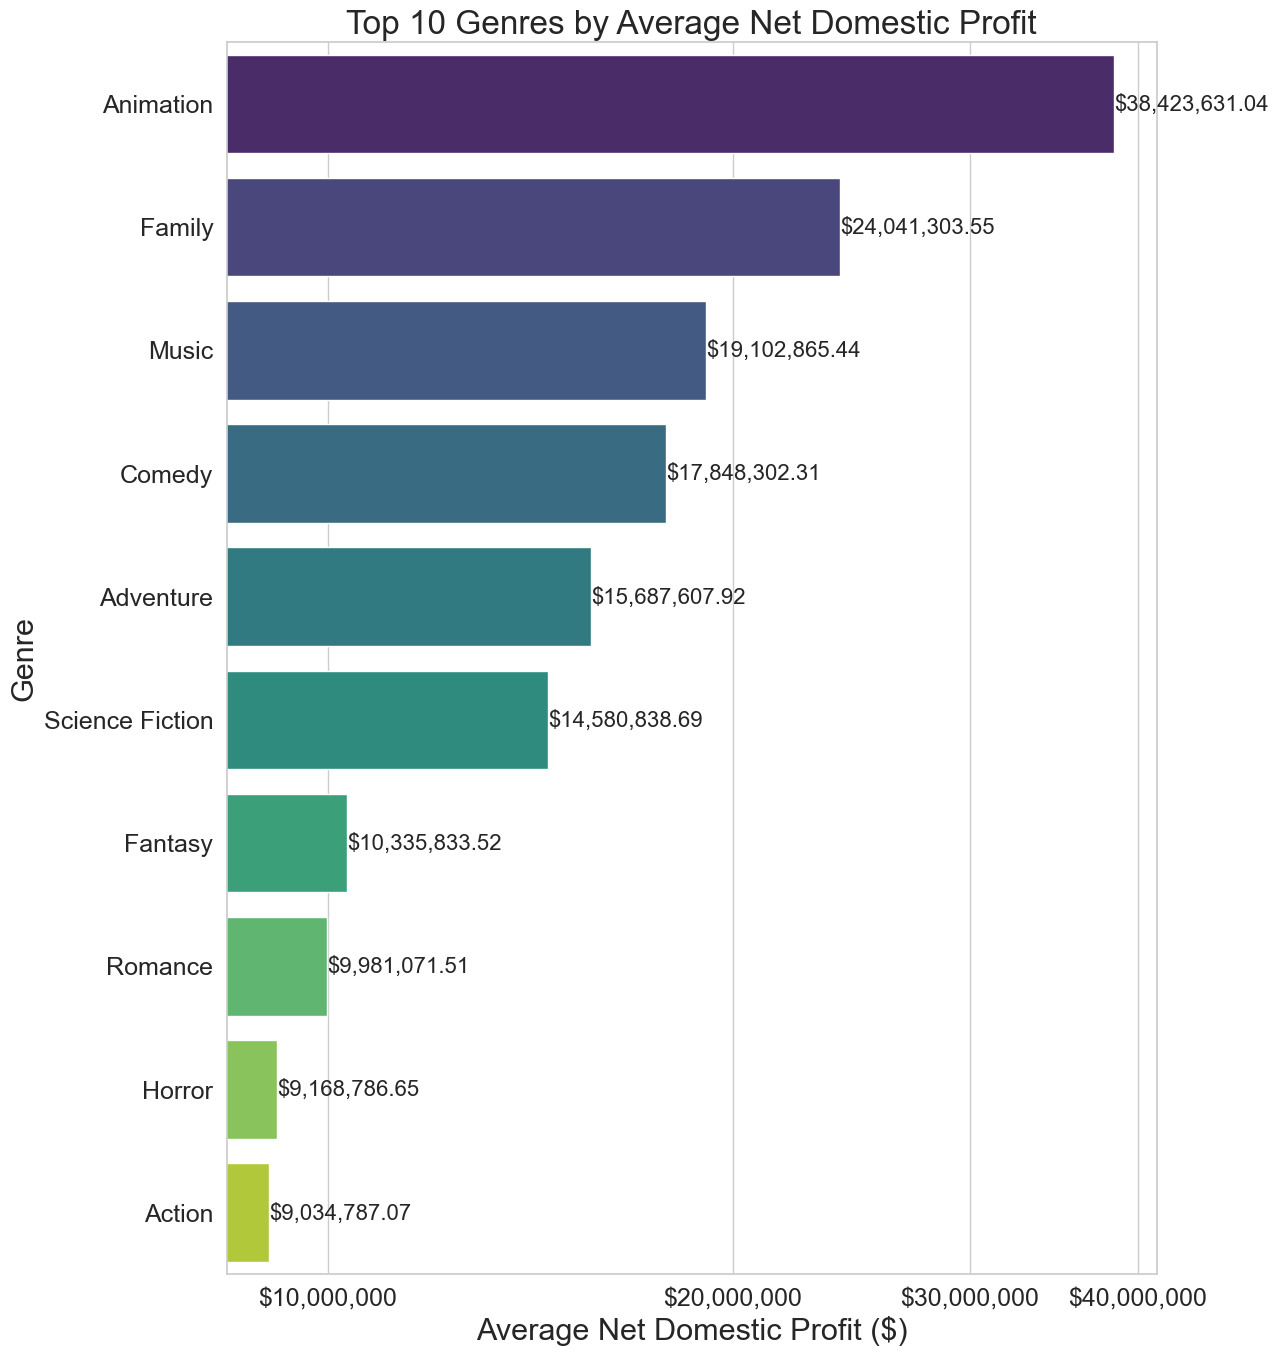

In [77]:
import matplotlib.pyplot as plt # Importing the 'matplotlib.pyplot'
                                # library to create and customize
                                # plots and visualizations
        
import seaborn as sns # Importing the Seaborn library 
                      # to create statistical graphics

# Importing 'FuncFormatter' for custom formatting 
# of axis tick labels, like converting numerical
# labels into currency format
# Importing 'MaxNLocator' for the ability to customize
# the number and location of ticks on an axis
from matplotlib.ticker import FuncFormatter, MaxNLocator
                        

# Define a function to format the x-axis labels as currency
def currency_formatter(x, pos):
    return '${:,.0f}'.format(x)

# Select top 10 genres with the highest average net profit
top_genres_domestic = genre_avg_profit_domestic_sorted.head(10)

# Set the style and size of the plot
plt.figure(figsize=(12,16))
sns.set(style="whitegrid")

# Create a bar plot
sns.barplot(x='average_net_profit_domestic', y='genre', data=top_genres_domestic, palette='viridis')

# Add titles and labels
plt.title('Top 10 Genres by Average Net Domestic Profit', fontsize=24)
plt.xlabel('Average Net Domestic Profit ($)', fontsize=22)
plt.ylabel('Genre', fontsize=22)

plt.yticks(fontsize=18)

plt.xticks(fontsize=18)

# Use log scale for better visualization if there's a wide range in values
plt.xscale('log')

# Set the major locator to ensure appropriate tick placement
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='upper', nbins=4))

# Apply the currency formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency_formatter))

# Annotate bars with formatted currency values
for index, value in enumerate(top_genres_domestic['average_net_profit_domestic']):
    plt.text(value, index, format_currency(value), va='center', ha='left', fontsize=16)

# Display the plot
plt.show()

In [40]:
# Group by 'genre_ids' and calculate average net worldwide profit
genre_avg_profit_worldwide = merged_df_exploded.groupby('genre_ids')['net_profit_worldwide'].mean().reset_index()

# Rename columns for clarity
genre_avg_profit_worldwide.columns = ['genre', 'average_net_profit_worldwide']


# Sort the DataFrame by 'average_net_profit_worldwide' in 
# descending order

genre_avg_profit_worldwide_sorted = genre_avg_profit_worldwide.sort_values(by='average_net_profit_worldwide', ascending=False)

# Apply the currency formatting function we created above 
# to the 'average_net_profit_worldwide' column

genre_avg_profit_worldwide_sorted['formatted_avg_profit_worldwide_sorted'] = genre_avg_profit_worldwide_sorted['average_net_profit_worldwide'].apply(format_currency)

# Display the sorted DataFrame with the new formatted column
genre_avg_profit_worldwide_sorted.head()

,genre,average_net_profit_worldwide,formatted_avg_profit_worldwide_sorted
1,Adventure,2.549632e+08,"$254,963,195.75"
2,Animation,2.458732e+08,"$245,873,240.63"
8,Fantasy,2.150924e+08,"$215,092,359.90"
7,Family,1.958547e+08,"$195,854,689.64"
14,Science Fiction,1.869794e+08,"$186,979,401.78"


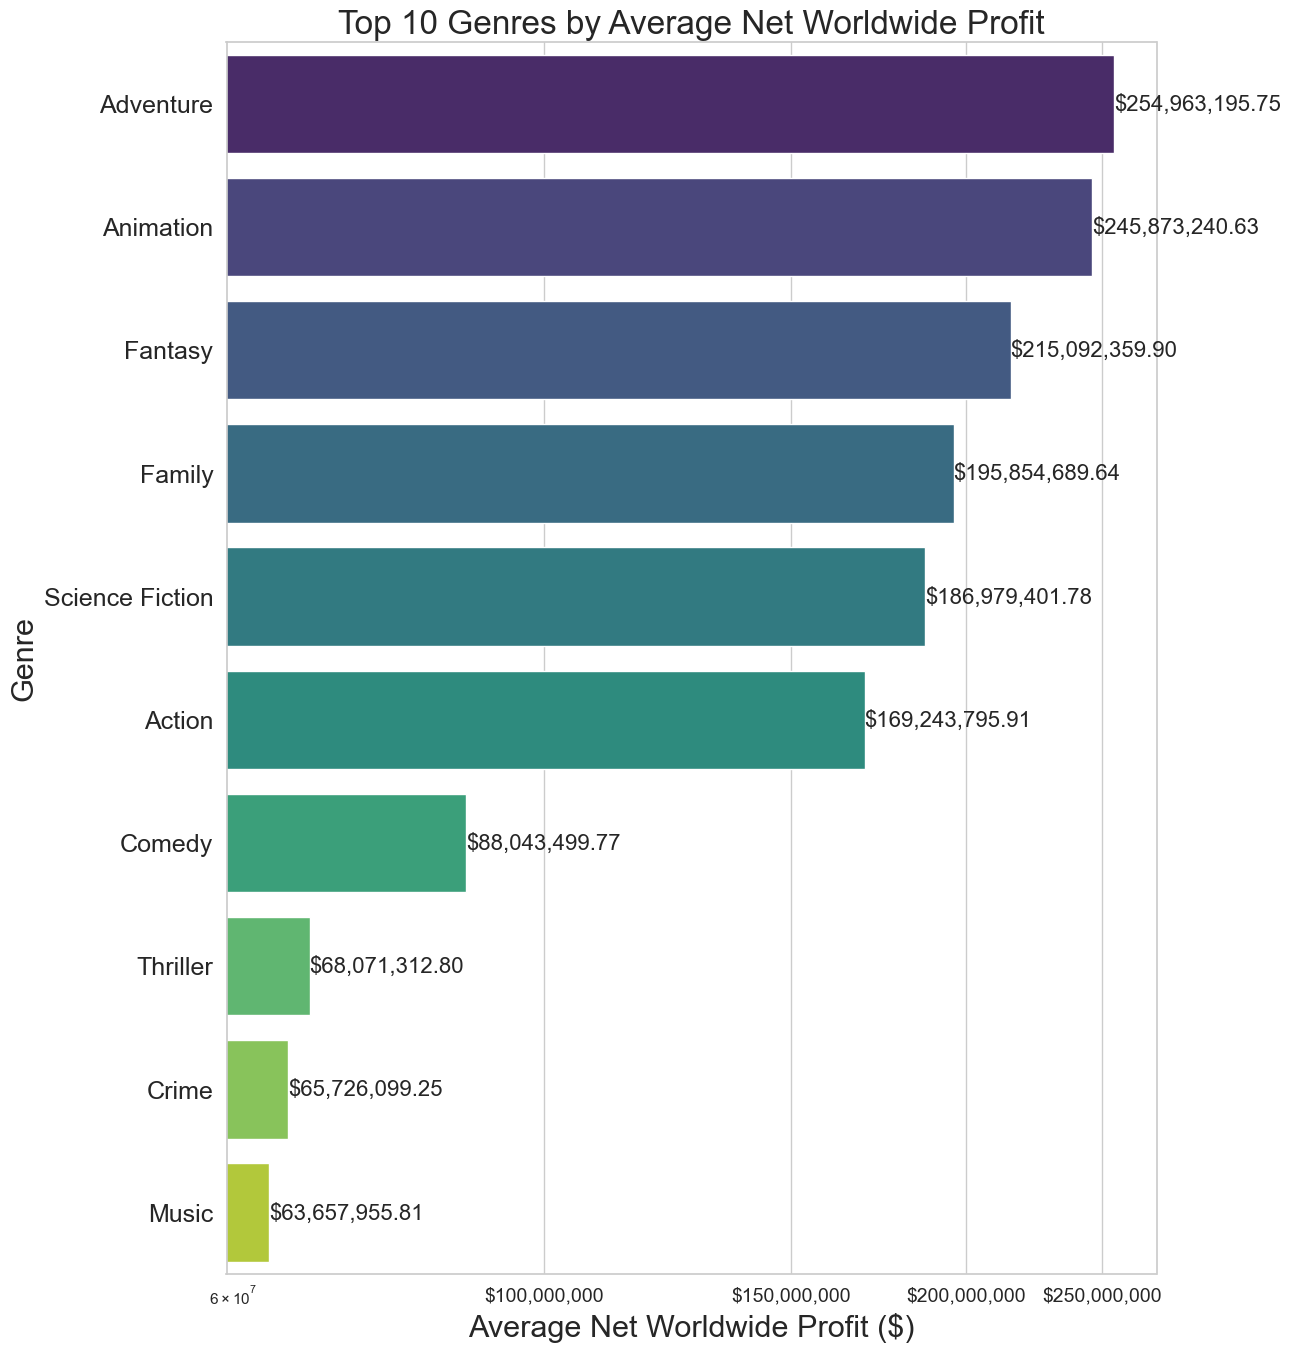

In [83]:
# Define a function to format the x-axis labels as currency
def currency_formatter(x, pos):
    return '${:,.0f}'.format(x)

# Select top 10 genres with the highest average net profit
top_genres_worldwide = genre_avg_profit_worldwide_sorted.head(10)

# Set the style and size of the plot
plt.figure(figsize=(12,16))
sns.set(style="whitegrid")

# Create a bar plot
sns.barplot(x='average_net_profit_worldwide', y='genre', data=top_genres_worldwide, palette='viridis')

# Add titles and labels
plt.title('Top 10 Genres by Average Net Worldwide Profit', fontsize=24)
plt.xlabel('Average Net Worldwide Profit ($)', fontsize=22)
plt.ylabel('Genre', fontsize=22)

plt.yticks(fontsize=18)

plt.xticks(fontsize=14)

# Use log scale for better visualization if there's a wide range in values
plt.xscale('log')

# Set the major locator to ensure appropriate tick placement
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='upper', nbins=5))

# Apply the currency formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency_formatter))

# Annotate bars with formatted currency values
for index, value in enumerate(top_genres_worldwide['average_net_profit_worldwide']):
    plt.text(value, index, format_currency(value), va='center', ha='left', fontsize=16)

# Display the plot
plt.show()

# Recommendation #1
## Top 5 Most Profitable Genres for Domestic and Worldwide Films
If QMD+ Studios plans to only release films domestically (in the United States), we should produce the following genre of films, as they are the most profitable on average:
* Animation:`$38,423,631.04` Average Net Profit
* Family: `$24,041,303.55` Average Net Profit
* Music: `$19,102,865.44` Average Net Profit
* Comedy: `$17,848,302.31` Average Net Profit
* Adventure: `$15,687,607.92` Average Net Profit

If QMD+ Studios decides to release films internationally, we should produce the following genre of films, as they are the most profitable on average:

* Adventure: `$254,963,195.75` Average Net Profit
* Animation: `$245,873,240.63` Average Net Profit
* Fantasy: `$215,092,359.90` Average Net Profit
* Family: `$195,854,689.64` Average Net Profit
* Science Fiction: `$186,979,401.78` Average Net Profit

## Analysis for Recommendation #2: Top 10 Highest Rated Directors and Writers
Great films usually involve directors and writers with fantastic track records. To provide further insight on how QMD+ Studios can create successful films, we are going to run an analysis to find the top ten highest rated Directors and Writers. 

To gather this information, we use the 'im.db' SQL relational database provided to us, which is comprised of tables containing an abundance of movie data, including movie ratings, vote counts, directors, writers, and movie titles. 

To begin, we write a query that retrieves the names of all tables in the SQLite database. We first use 'SELECT name' to get the 'name' column, as that is information we want in a table. Then we use 'FROM sqlite_master' to specify that the query is retrieving data from the 'sqlite_master' table. The 'sqlite_master' table is a special system table in SQLite that stores metadata about all database objects, including tables, indexes, and views. Finally, 'WHERE type='table'" filters the results to only include rows where the 'type' column is 'table'. 'pd.read_sql(q, conn) is a function from the Pandas library that executes the SQL query and returns the results in a DataFrame. 

The result of this query provided us with a DataFrame showing all tables in our SQLite database:
* movie_basics
* directors
* known_for
* movie_akas
* movie_ratings
* persons
* principals
* writers

Now we will open up these tables to get a view of the information they contain, some of which we will use for our analysis. Instead of writing 8 separate queries, we're going to write a loop to to automate the process of previewing the structure and sample data of all tables in our SQLite database. We'll take the same query to gather all the names of the tables in our SQLite database and we define 'pd.read_sql(q, conn)', which executes the SQL query and reads the results into a pandas DataFrame, as 'table_names_df'. We then define 'table_names_df['name'].tolist()' as 'table_names'. 'table_names_df' contains the names of all the tables and adding the 'tolist()' method converts this column into a list of table names stored in 'table_names'. Since we ony want a preview and don't want the output to take up a lot of room, we set a variable 'preview_row_count' as '5' and initialize an empty dictionary 'table_previews' to store the preview data for each table. 

Next, we write a for loop that iterates through each table name in 'table_names'. Inside the loop, we write a query that selects all tables from '{table_name}' and limits the results to '{preview_row_count}'. We then store the resulting DataFrame as a key in the 'table_previews' dictionary. To display this, we write another for loop to iterate through the items in the 'table_previews' dictionary. Each item is a key-value pair where the key is the table name and the value is the DataFrame. We print a message indicating which table is previewed and display the resulting DataFrame. 

In [42]:
# Query to retreive names of all tables in the SQLite database
# 'sqlite_master' is a system table that stores information
# about all tables
q = """SELECT name FROM sqlite_master WHERE type='table';"""
pd.read_sql(q, conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [43]:
q = """
        SELECT name 
        FROM sqlite_master
        WHERE type='table';
        """

table_names_df = pd.read_sql(q, conn)

table_names = table_names_df['name'].tolist()

preview_row_count = 5

table_previews = {}

for table_name in table_names:
    query = f"""
            SELECT *
            FROM {table_name}
            LIMIT {preview_row_count}
            ;
            """
    table_previews[table_name] = pd.read_sql(query, conn)
    
for table_name, df in table_previews.items():
    print(f"Preview of {table_name} table: ")
    display(df)
    print("\n")

Preview of movie_basics table: 


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"




Preview of directors table: 


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502




Preview of known_for table: 


,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534




Preview of movie_akas table: 


,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0




Preview of movie_ratings table: 


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21




Preview of persons table: 


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,None,None,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,None,None,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,None,None,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,None,None,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,None,None,"production_designer,art_department,set_decorator"




Preview of principals table: 


,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"




Preview of writers table: 


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


## Useful SQLite Database Information
Upon previewing the columns and records of each table in our SQLite database, we can determine which tables we must utilize to conduct our analysis of finding the highest rated writers and directors. 

* Table: directors
    * Useful Columns: movie_id, person_id
* Table: movie_ratings
    * Useful Columns: movie_id, averagerating, numvotes
* Table: persons
    * Useful Columns: person_id, primary_name, primary_profession
* Table: writers
    * Useful Columns: movie_id, person_id
    
The tables 'directors' and 'writers' contain the columns 'movie_id' and 'person_id'. The 'persons' table contains the 'primary_name' attached to each 'person_id' so that we can query the actual name, and not just the 'person_id'. The 'persons' table also contains 'primary_profession' so we can use that to filter out people whose professions are not directors or writers. Since both the 'directors' and 'writers' tables have a 'movie_id' paired with a 'person_id', we can use that to join with our 'movie_ratings' table, which contains the 'averagerating' and 'numvotes' associated with each 'movie_id'. We do not need the 'movie_basics' table, which contains the 'primary_title' associated with each 'movie_id', because we are only concerned with finding the highest rated directors and writers and do not need to print out the actual movie titles. 

## Vote Threshold
To evaluate the best writers and directors, we use the data from the 'movie_ratings' table, which includes the 'movie_id', 'averagerating', and 'numvotes'. The 'averagerating' column is a scale from 1 to 10. The rating is an average of the total number (votes) ratings it received. The number of votes for each 'movie_id' ranges from a low of 5 to a high of 1,841,066. 

Initially, I decided to use the average vote count as the threshold for my analysis. The average number of votes per 'movie_id' is 3,523.66 votes. Upon querying to find the highest rated directors and writers with a threshold (LIMIT) of 3,523.66 votes (numvotes), I found that this led to a conclusion highlighting very unknown writers and directors who usually had one successful small movie with a high rating, but relatively low number of votes. This did not align with the goal of identifying the top writers and directors with consistent, high quality work.

To improve the quality of this analysis, I increased the vote count threshold to 100,000. This ensures that the data used in this analysis represents movies with a substantial amount of votes, reflecting a more accurate audience opinion and reliable rating. Through this, we can remove outliers, who have a high rating and low audience feedback, and ensure that QMD+ Studios can make decisions based on reliable data in order to select the top talent. 

In [44]:
# Query to retreive all columns and values 
# from the 'movie_ratings' table, ordered by
# descending numvotes
q = """
SELECT *
    FROM movie_ratings
    ORDER BY numvotes DESC
;
"""
pd.read_sql(q, conn)

,movie_id,averagerating,numvotes
0,tt1375666,8.8,1841066
1,tt1345836,8.4,1387769
2,tt0816692,8.6,1299334
3,tt1853728,8.4,1211405
4,tt0848228,8.1,1183655
...,...,...,...
73851,tt8420530,6.8,5
73852,tt8747790,4.6,5
73853,tt9367004,8.2,5
73854,tt9647642,2.0,5


In [45]:
# Query to calculate average number of votes from the 
# 'movie_ratings' table
# 'AVG(numvotes)' calculates average of the 'numvotes' column
q = """
SELECT AVG(numvotes) AS avg_num_votes
    FROM movie_ratings
    
;
"""
pd.read_sql(q, conn)

,avg_num_votes
0,3523.662167


## Top 10 Highest Rated Directors and Writers
With the tables in our SQLite database evaluated and the vote count (numvotes) rationalized, we can write a query to find the highest rated directors and writers. 

First we select the relevant columns, which are 'primary_name' and 'averagerating'. We use 'p.primary_name' because we create an alias for the 'persons' table as 'p' later in the query. We also create an alias for 'primary_name' as 'director_name' and create an alias for 'AVG(averagerating)' as 'average_rating'. We use the aggregate function 'AVG()' on the 'averagerating' column because we want to return the average rating of each director, which we will group the data by later in the query. Then we assign 'directors' as the alias 'd' and specify it as the primary table using "FROM directors d". Now, we need to join a few tables to this query in order to pool the data together. Using 'movie_id' as the foreign key (common value), we join the 'movie_ratings' table with our primary table 'directors'. This join forms a link between the 'movie_ratings' and 'directors' tables, allowing us to connect the movie rating to the 'person_id' in the 'directors' table. We then join the 'persons' table our chained join using the 'person_id' column in the 'directors' table, which allows us to link the 'person_id' to the 'primary_name' column in the 'persons' table, giving us access to actual names instead of just IDs. After our joins are completed, we further filter the data using a "WHERE" clause to filter the data to only include individuals in the 'persons' table which contain the word 'director' in the 'primary_profession' column. "%" is used before and after the word 'directors' because many people have multiple professions, like 'producer' or 'actor', and we need to isolate the word 'director' to make sure all people who are directors are included, not just people who are only directors. Next, we group the results by 'person_id' and 'primary_name' from 'p' ('persons' table) in order to properly calculate the average rating for each director. After this, we set our threshold using a 'HAVING' clause to filter out movies with less than 100,000 votes, eliminating outliers and giving us reliable ratings and established directors. Finally, we use "ORDER BY" to order the data by 'average_rating' from highest rating to lowest (descending) and limit the output to 10 results. 

To find the top 10 writers, we repeat this process, except we use the 'writers' table instead of the 'directors' table and use the 'WHERE' clause to filter by '%writer%' instead of '%director'. 

In [46]:
# Query to find the top 10 directors with the highest 
# average movie ratings
# This query aggregates data from multiple tables to identify 
# directors with high ratings
q = """
SELECT p.primary_name AS director_name,
        AVG(averagerating) AS average_rating, mr.numvotes AS vote_count
    FROM directors d
    JOIN movie_ratings mr ON d.movie_id = mr.movie_id
    JOIN persons p ON d.person_id = p.person_id
    WHERE p.primary_profession LIKE '%director%'
    GROUP BY p.person_id, p.primary_name -- Group results by director's ID and name to aggregate ratings
    HAVING numvotes > 100000
    ORDER BY average_rating DESC
    LIMIT 10
;
"""
top_directors_df=pd.read_sql(q, conn)
top_directors_df

,director_name,average_rating,vote_count
0,Rodney Rothman,8.500000,210869
1,Bob Persichetti,8.500000,210869
2,Christopher Nolan,8.437500,1299334
3,Anthony Russo,8.246667,666252
4,Joe Russo,8.246667,666252
5,Mel Gibson,8.100000,366904
6,Damián Szifron,8.100000,151123
7,Robert Eggers,8.066667,154278
8,Rajkumar Hirani,8.020000,138012
9,Stephen Chbosky,8.000000,422671


In [47]:
# Query to find the top 10 writers with the highest 
# average movie ratings
# This query aggregates data from multiple tables to identify 
# writers with high ratings

q = """
SELECT p.primary_name AS writer_name,
        AVG(averagerating) AS average_rating, mr.numvotes AS vote_count
    FROM writers w
    JOIN movie_ratings mr ON w.movie_id = mr.movie_id
    JOIN persons p ON w.person_id = p.person_id
    WHERE p.primary_profession LIKE '%writer%'
    GROUP BY p.person_id, p.primary_name
    HAVING numvotes > 100000
    ORDER BY average_rating DESC
    LIMIT 10
;
"""
top_writers_df=pd.read_sql(q, conn)
top_writers_df

,writer_name,average_rating,vote_count
0,Quentin Tarantino,8.675000,1211405
1,Jonathan Nolan,8.500000,1299334
2,Philippe Pozzo di Borgo,8.500000,677343
3,Tony Kushner,8.433333,228701
4,Jason Katz,8.400000,277194
5,Brian Hayes Currie,8.300000,204972
6,Denis Villeneuve,8.300000,124156
7,Wajdi Mouawad,8.300000,124156
8,Jim Starlin,8.242857,948394
9,Jordan Belfort,8.200000,1035358


## Top 10 Directors and Writers: Visual
To create a visual for our top 10 directors, we utilize the same libraries we used to find the highest net profit genres: matplotlib.pyplot, seaborn, and FuncFormatter from matplotlib.ticker. Since 'average_rating' column goes out to 6 decimals, we're going to define a declare called 'decimal_formatter' which takes a value 'x' and position 'pos' and returns "'{:.1f}'.format(x)", which returns 'x' formatted to one decimal place as a string. This is used to format the x-axis labels, as numbers extended out 6 decimal places would start to overlap with each other. Next, we set the style and size of the plot using 'plt.figure(figsize=(12, 8))', which creates a new figure with a size of 12 inches by 8 inches, and 'sns.set(style="Whitegrid")', which sets the Seaborn style to 'whitegrid'. Then we create a bar plot using 'sns.barplot()' with the following parameters: "x='average_rating'"(makes 'average_rating' column the x-axis), "y='director_name'" (makes 'director_name' column the y-axis), 'data=top_directors_df' (specifies the DataFrame containing the data), and "pallette='viridis'" (chooses 'viridis' color palette for the bars). Next, we add a title, x-axis label, and y-axis label using 'plt.title()', 'plt.xlabel()', and 'plt.ylabel()'. After this, we utilize 'plt.gca()' which retrieves the current 'axes' instance of the current figure or creates a new one if no axes exist. Attached to 'plt.title()' is 'xaxis.set_major_formatter(FuncFormatter(decimal_formatter))' which provides access to the x-axis ('xaxis'), sets the primary ticks on the x axis ('set_major_formatter()'), and customizes the formatting of the ticks using the 'decimal_formatter' function we declared earlier ('FuncFormatter(decimal_formatter)'). Next, we set the x-axis limit from 7.9 to 8.6 using 'plt.xlim(7.9, 8.6)' and create a for loop to annotate each bar with its' actual rating. We start with 'for p in ax.patches:' which iterates over each bar in the plot. Within this loop, we assign 'p.get_width()' as 'width', which gets the width of the bar and corresponds to the 'average_rating' value. 'f'{width:.1f}' is assigned as 'label', and that formats the label to one decimal place. 'plt.text()' adds text annotations to the plot as well as the position, size, color, and text to be displayed. Finally, we display the plot using 'plt.show()'. We repeat this process for both the top 10 directors and the top 10 writers. 

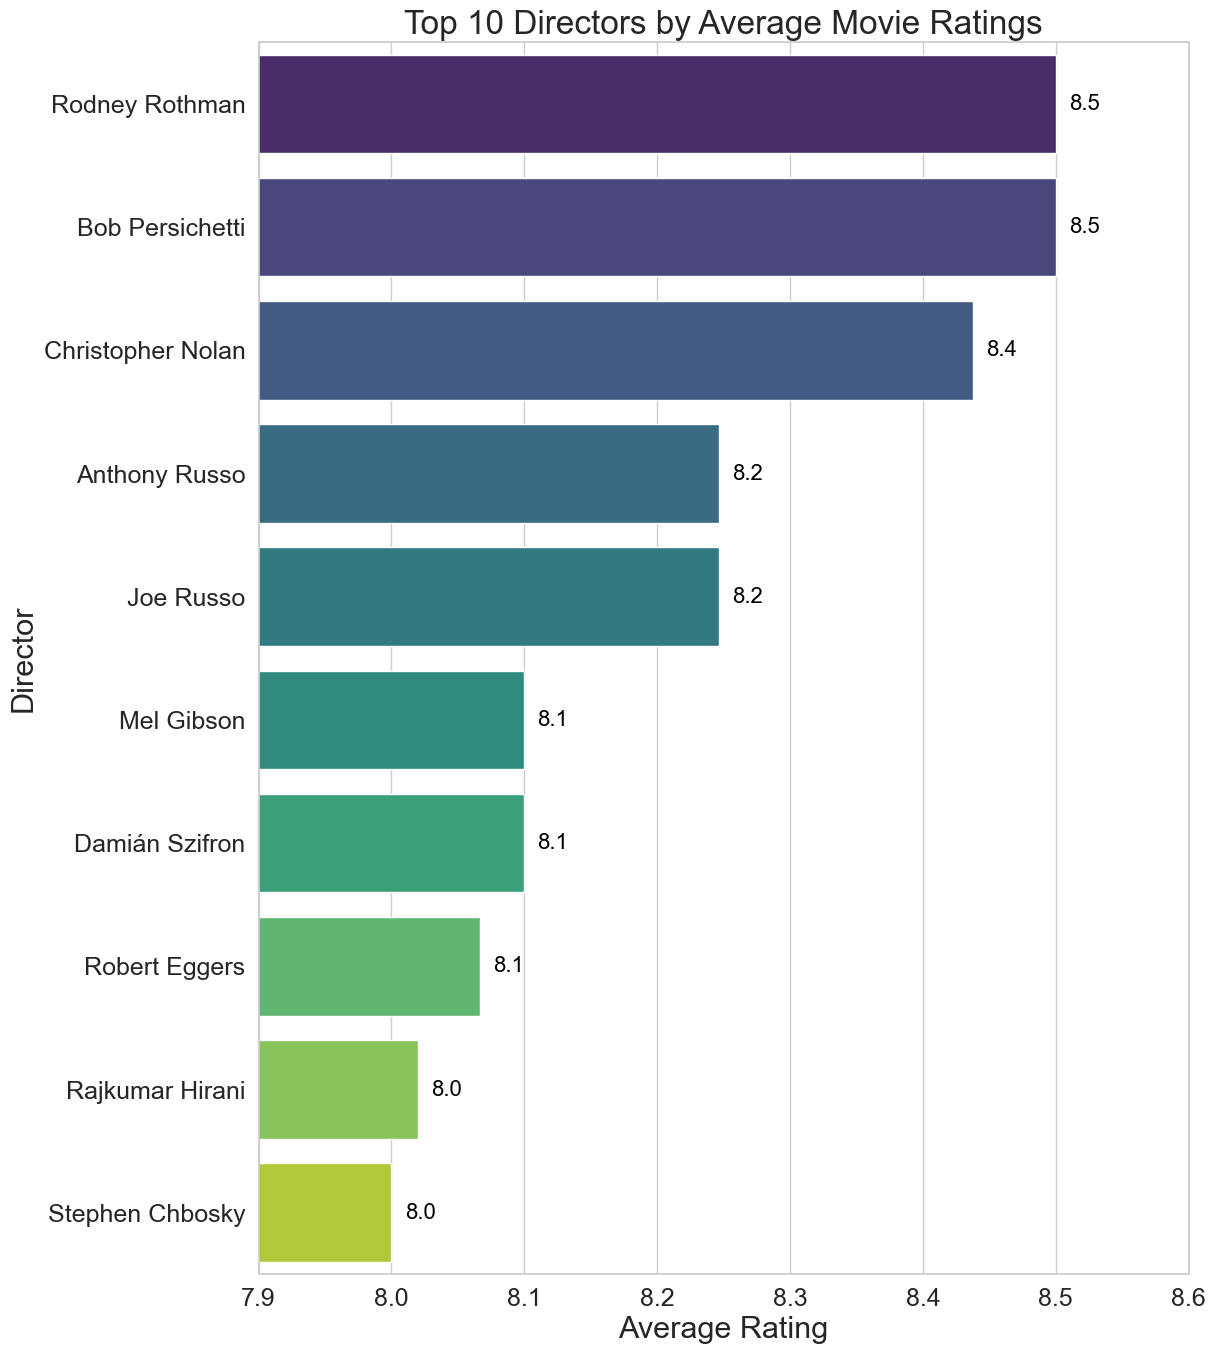

In [84]:
# Define a function to format the y-axis labels as decimal
def decimal_formatter(x, pos):
    return '{:.1f}'.format(x)

# Set the style and size of the plot
plt.figure(figsize=(12, 16))
sns.set(style="whitegrid")

# Create a bar plot
ax = sns.barplot(x='average_rating', y='director_name', data=top_directors_df, palette='viridis')

# Add titles and labels
plt.title('Top 10 Directors by Average Movie Ratings', fontsize=24)
plt.xlabel('Average Rating', fontsize=22)
plt.ylabel('Director', fontsize=22)

plt.yticks(fontsize=18)

plt.xticks(fontsize=18)

# Apply the decimal formatter to the y-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(decimal_formatter))

# Set the x-axis limit
plt.xlim(7.9, 8.6)


# Annotate each bar with the actual rating value
for p in ax.patches:
    width = p.get_width()
    label = f'{width:.1f}'  # Format the label to one decimal place
    plt.text(width + 0.01, p.get_y() + p.get_height()/2, label,
             ha='left', va='center', fontsize=16, color='black')

# Display the plot
plt.show()


In [49]:
#VISUAL GOES HERE
#here is where put a visual we show top 5-10 writers, including 
    #number of votes and avg rating

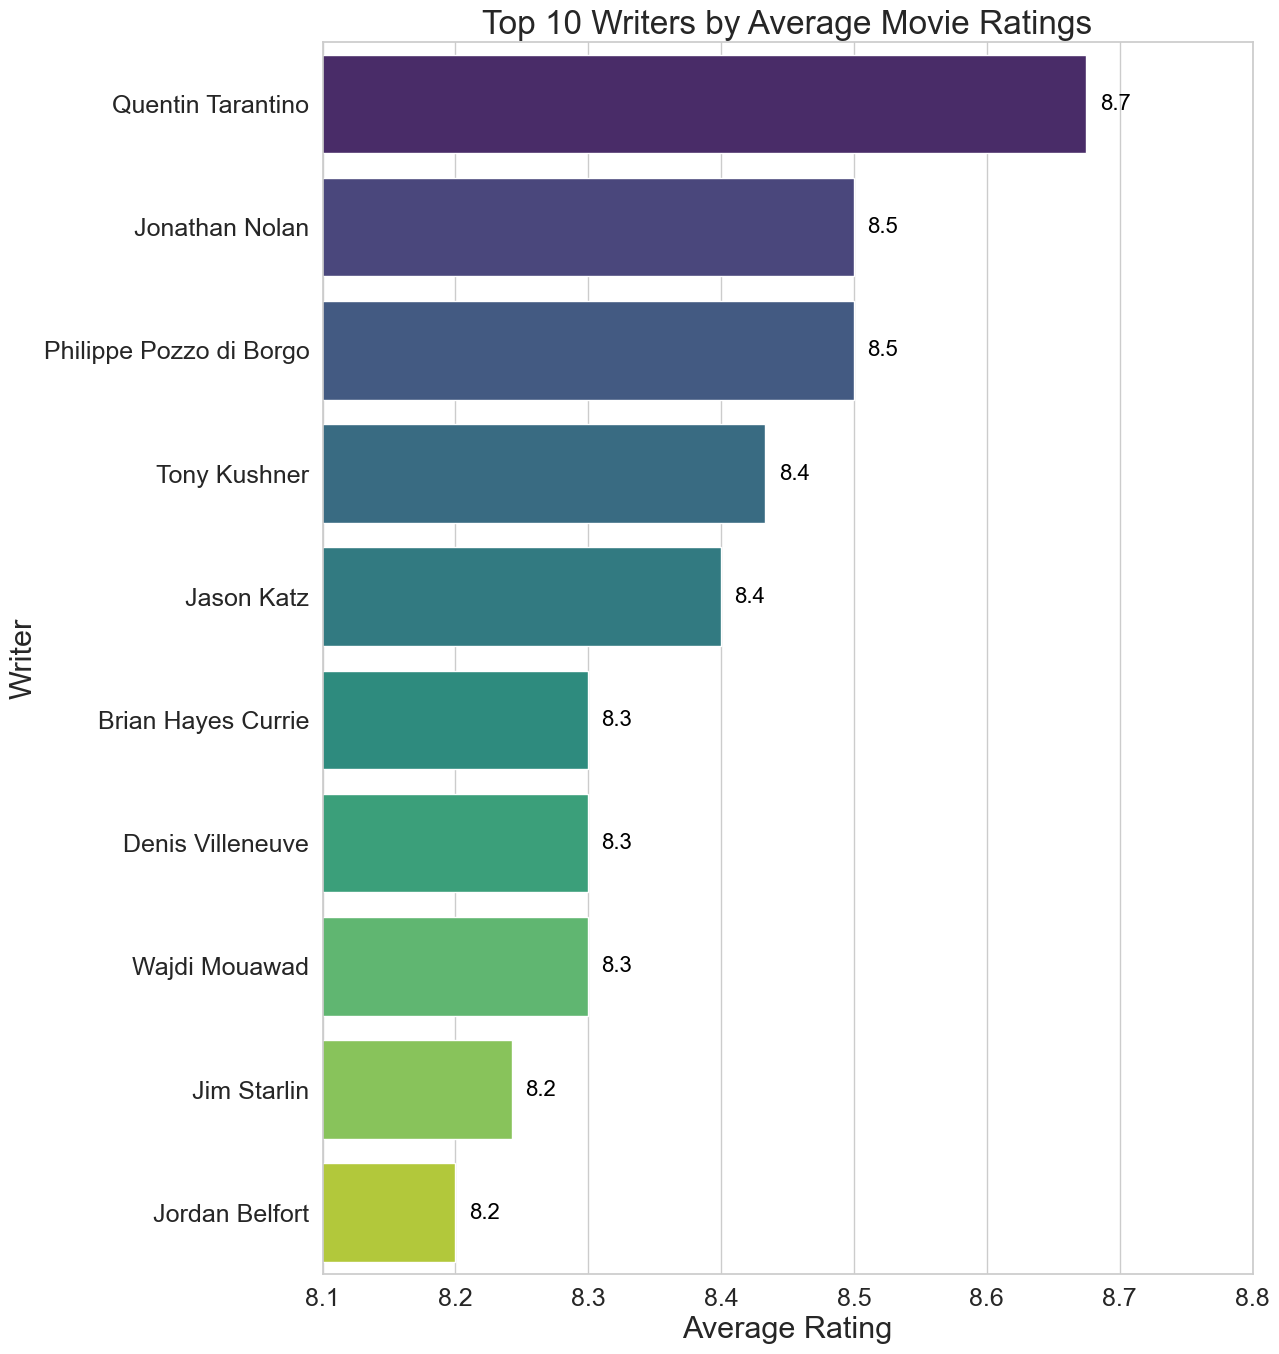

In [85]:
# Define a function to format the y-axis labels as decimal
def decimal_formatter(x, pos):
    return '{:.1f}'.format(x)

# Set the style and size of the plot
plt.figure(figsize=(12, 16))
sns.set(style="whitegrid")

# Create a bar plot
ax = sns.barplot(x='average_rating', y='writer_name', data=top_writers_df, palette='viridis')

# Add titles and labels
plt.title('Top 10 Writers by Average Movie Ratings', fontsize=24)
plt.xlabel('Average Rating', fontsize=22)
plt.ylabel('Writer', fontsize=22)

plt.yticks(fontsize=18)

plt.xticks(fontsize=18)

# Apply the decimal formatter to the y-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(decimal_formatter))

# Set the x-axis limit
plt.xlim(8.1, 8.8)


# Annotate each bar with the actual rating value
for p in ax.patches:
    width = p.get_width()
    label = f'{width:.1f}'  # Format the label to one decimal place
    plt.text(width + 0.01, p.get_y() + p.get_height()/2, label,
             ha='left', va='center', fontsize=16, color='black')

# Display the plot
plt.show()


# Recommendation #2
## Top 10 Highest Rated Directors and Writers
To enhance the likelihood of producing financially lucrative and critically acclaimed films, QMD+ Studios should hire these directors and writers, who possess a proven history of success and consistently high ratings.

### Directors
* 1. **Rodney Rothman**
    * Average Rating: `8.50`
    * Vote Count: `210,869.00`
<br><br>
* 2. **Bob Persichetti**
    * Average Rating: `8.50`
    * Vote Count: `210,869.00`
<br><br>
* 3. **Christopher Nolan**
    * Average Rating: `8.44`
    * Vote Count: `1,299,334.00`
<br><br>
* 4. **Anthony Russo**
    * Average Rating: `8.25`
    * Vote Count: `666,252.00`
<br><br>
* 5. **Joe Russo**
    * Average Rating: `8.25`
    * Vote Count: `666,252.00`
<br><br>
* 6. **Mel Gibson**
    * Average Rating: `8.10`
    * Vote Count: `366,904.00`
<br><br>
* 7. **Damián Szifron**
    * Average Rating: `8.10`
    * Vote Count: `151,123.00`
<br><br>
* 8. **Robert Eggers**
    * Average Rating: `8.07`
    * Vote Count: `154,278.00`
<br><br>
* 9. **Rajkumar Hirani**
    * Average Rating: `8.02`
    * Vote Count: `138,012.00`
<br><br>
* 10. **Stephen Chbosky**
    * Average Rating: `8.00`
    * Vote Count: `422,671.00`
<br><br> 

### Writers
* 1. **Quentin Tarantino**
    * Average Rating: `8.68`
    * Vote Count: `1,211,405.00`
<br><br>
* 2. **Jonathan Nolan**
    * Average Rating: `8.50`
    * Vote Count: `1,299,334.00`
<br><br>
* 3. **Philippe Pozzo di Borgo**
    * Average Rating: `8.50`
    * Vote Count: `677,343.00`
<br><br>
* 4. **Tony Kushner**
    * Average Rating: `8.43`
    * Vote Count: `228,701.00`
<br><br>
* 5. **Jason Katz**
    * Average Rating: `8.40`
    * Vote Count: `277,194.00`
<br><br>
* 6. **Brian Hayes Currie**
    * Average Rating: `8.30`
    * Vote Count: `204,972.00`
<br><br>
* 7. **Denis Villeneuve**
    * Average Rating: `8.30`
    * Vote Count: `124,156.00`
<br><br>
* 8. **Wajdi Mouawad**
    * Average Rating: `8.30`
    * Vote Count: `124,156.00`
<br><br>
* 9. **Jim Starlin**
    * Average Rating: `8.24`
    * Vote Count: `948,394.00`
<br><br>
* 10. **Jordan Belfort**
    * Average Rating: `8.20`
    * Vote Count: `1,035,358.00`
<br><br> 

## Analysis for Recommendation #3: Investigating the Relationship Between Production Budget and Net Profit Using Pearson Correlation and Linear Regression Analysis
Our final insight is based on analyzing the relationship between production budget and net income. More specifically, we're going to run two calculations to determine the relationship between production budget and net income: Pearson Correlation and Regression Analysis. 

A Pearson correlation will tell us if there is a linear relationship between these two variables and how strong that relationship is. Specifically, we are looking to see if higher production budgets lead to higher net incomes. 

A regression analysis goes a little deeper and dives into the direction and strength of the relationship. With regression, we are able to quantify the relationship by finding the change in net income for each unit change in production budget, which allows us to make predictions about the net income based on a given production budget. On top of this, it gives us an assortment of statistical measures, such as R-Squared, which tells us how well the data fits a regression model and quantifies the proprotion oof the variance of the dependent variable that is predictable from the independent variable. 


## Pearson Correlation
To calculate the Pearson correlation, we start by importing a few necessary libraries: NumPy and stats from SciPy. NumPy is a library that provides an efficient and convenient way to run a multitude of mathematical functions on arrays and matrices and 'stats' is a module within the SciPy library that provides a large number of probability distributions, statistical functions, and tests. 

After this, we extract the 'merged_df['production_budget']', 'merged_df['net_profit_domestic']', and 'merged_df['net_profit_worldwide']' and assign them as 'production_budget', 'net_profit_domestic', and 'net_profit_worldwide' respectively. We set the significance level (alpha) at 0.05 (5%), which is a common threshold in statistical tests to determine if the result is statistically significant. Next, we use the 'stats.pearsonr' function to calculate the Pearson correlation coefficient ('r_domestic') and p-value('p_value_domestic') for the relationship between production budget and net domestic profit. The correlation coefficient (r) ranges from -1 to 1 and tells us the direction and magnitude of the relationship. If 'r = +1', both variables are in perfect positive correlation, in which an increase in one variable will lead to a proportional increase in the other variable. If 'r = -1', both variables are in perfect negative correlation, in which an increase in one variable will lead to a proportional decrease in the other variable. The p-value ranges from 0 to 1 and helps determine if the correlation coefficient (r) is statistically significant. A small p-value suggests the observed correlation is statistically significant and not due to random chance, while a large p-value suggests that the observed correlation is not statistically significant and may be random. To determine how big or small the p-value is, we compare it to our significance level, alpha. If 'p-value < alpha', we can reject the null and say the correlation is statistically significant. If 'p-value > alpha', we fail to reject null and can say the correlation is not statistically significant. Finally, we print out the 'r_domestic' and 'p-value' for 'net_profit_domestic' and then run the same 'stats.pearsonr' function for 'net_profit_worldwide' and print out 'r_worldwide' and its' 'p-value'.

In [51]:
import numpy as np # Importing the numpy library for numerical 
                   # computations and array operations, 
                   # using 'np' as an alias.

from scipy import stats # Importing the stats module from 
                        # the scipy library for statistical 
                        # functions and analysis.

# Extract columns for analysis        
production_budget = merged_df['production_budget']
net_profit_domestic = merged_df['net_profit_domestic']
net_profit_worldwide = merged_df['net_profit_worldwide']

# Significance level for statistical tests
alpha = 0.05

print("CORRELATION BETWEEN PRODUCTION BUDGET AND DOMESTIC NET PROFIT:\n")

# Calculate Pearson correlation coefficient and p-value for
# domestic net profit
r_domestic, p_value_domestic = stats.pearsonr(production_budget, net_profit_domestic)

print(f"Correlation Coefficient (r): {r_domestic}")
print(f"P-value: {p_value_domestic}")

if p_value_domestic < alpha:
    print("The Correlation between production budget and domestic net profit is statistically significant.\n")
else:
    print("The Correlation between production budget and domestic net profit is not statistically significant.\n")
    

print("CORRELATION BETWEEN PRODUCTION BUDGET AND WORLDWIDE NET PROFIT:\n")

# Calculate Pearson correlation coefficient and p-value for
# worldwide net profit
r_worldwide, p_value_worldwide = stats.pearsonr(production_budget, net_profit_worldwide)

print(f"Correlation Coefficient (r): {r_worldwide}")
print(f"P-value: {p_value_worldwide}")
      
# Calculate Pearson correlation coefficient and p-value for
# worldwide net profit
if p_value_worldwide < alpha:
      print("The correlation bewteen production budget and worldwide net profit is statistically significant.")
else:
      print("The correlation betweenn production budget and worldwide net profit is not statistically significant.")
      
    

CORRELATION BETWEEN PRODUCTION BUDGET AND DOMESTIC NET PROFIT:

Correlation Coefficient (r): 0.11861861008011144
P-value: 6.580367319358737e-07
The Correlation between production budget and domestic net profit is statistically significant.

CORRELATION BETWEEN PRODUCTION BUDGET AND WORLDWIDE NET PROFIT:

Correlation Coefficient (r): 0.6841223414635776
P-value: 1.4113471905537515e-241
The correlation bewteen production budget and worldwide net profit is statistically significant.


## Pearson Correlation Result Interpretation: Production Budget and Domestic Net Profit
Running this Pearson correlation resulted in a correlation coefficient (r) of 0.1186, which indicates a positive but weak correlation between production budget and domestic net profit. Despite the weak correlation, the P-value is extremely small at 6.58e-07 and is much lower than our significance level of 0.05. This means that although the correlation is weak, it is statistically significant and is unlikely to be due to random chance. Therefore, we can conclude that although production budget and domestic net profit are not strongly related, there is a statistically significant positive relationship between them. 


## Pearson Correlation Result Interpretation: Production Budget and Worldwide Net Profit
Running the Pearson correlation for production budget and worldwide net profit resulted in a correlation coefficient (r) of 0.684, which suggests a strong positive correlation between these two variables. This high correlation coefficient suggests that higher production budgets are associated with higher worldwide net profits. Furthermore, the P-value is extremely small at 1.411e-241 and is much lower than our significance level of 0.05, which indicates that the relationship is statistically significant and is very unlikely to be due to random variation in the data. Therefore, we can confidently conclude that there is a strong and statistically significant positive relationship between production budget and worldwide net profit. 

## Pearson Correlation: Visual
In the visual to represent our Pearson Correlation calculations, we will be utilizing some libraries that we have already imported: matplotlib.pyplot from python, seaborn from python, and stats from SciPy. To set the style and size of the plot, we use 'plt.figure(figsize=(14,6))' and 'sns.set(style="whitegrid")'. This initializes a new figure that's 14 inches wide and 6 inches tall and sets the Seaborn style to "whitegrid". 

Since we'll be creating two plots side by side, one representing the correlation between production budget and domestic net profit and second representing the correlation between production budget and worldwide net profit. To do this, we create a subplot in a 1x2 grid and select the first subplot 'plt.subplot(1, 2, 1)'. Next, we create a scatter plot with 'production_budget' on the x-axis and 'net_profit_domestic' on the y-axis, with the addition of making the points colored blue and give it an alpha (transparency) of 0.6. 'sns.scatterplot(x=production_budget, y=net_profit_domestic, color='blue', alpha =0.6)'. To add to this scatter plot, we include a dashed blue regression line, based on the calculation of the slope and intercept. 'sns.lineplot(x=production_budget, y=stats.linregress(production_budget, net_profit_domestic).intercept + stats.linregress(production_budget, net_profit_domestic).slope * production_budget, color='blue', linestyle='--')'. After this, we add labels using 'plt.title()', 'plt.xlabel()', and 'plt.ylabel()'. Lastly, because the data points of production budget and net profit spans several orders of magnitude, we set the x-axis and y-axis to a logarithmic scale in order to make it more readable and make sure the data doesn't clump to one side. 

For the correlation plot between production budget and worldwide net profit, we create a 1x2 subplot and select the second subplot, so that it is right next to the plot for the correlation between production budget and domestic net profit by doing 'plt.subplot(1, 2, 2)' and repeat the rest of the code for 'net_profit_worldwide'. Instead of blue lines, we are going to use green. 

Display both of these plots using 'plt.tight_layout()', which adjusts the subplots to fit into an area without overlapping, and 'plt.show()'. 

/Users/evancallaghan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/evancallaghan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/evancallaghan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/evancallaghan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

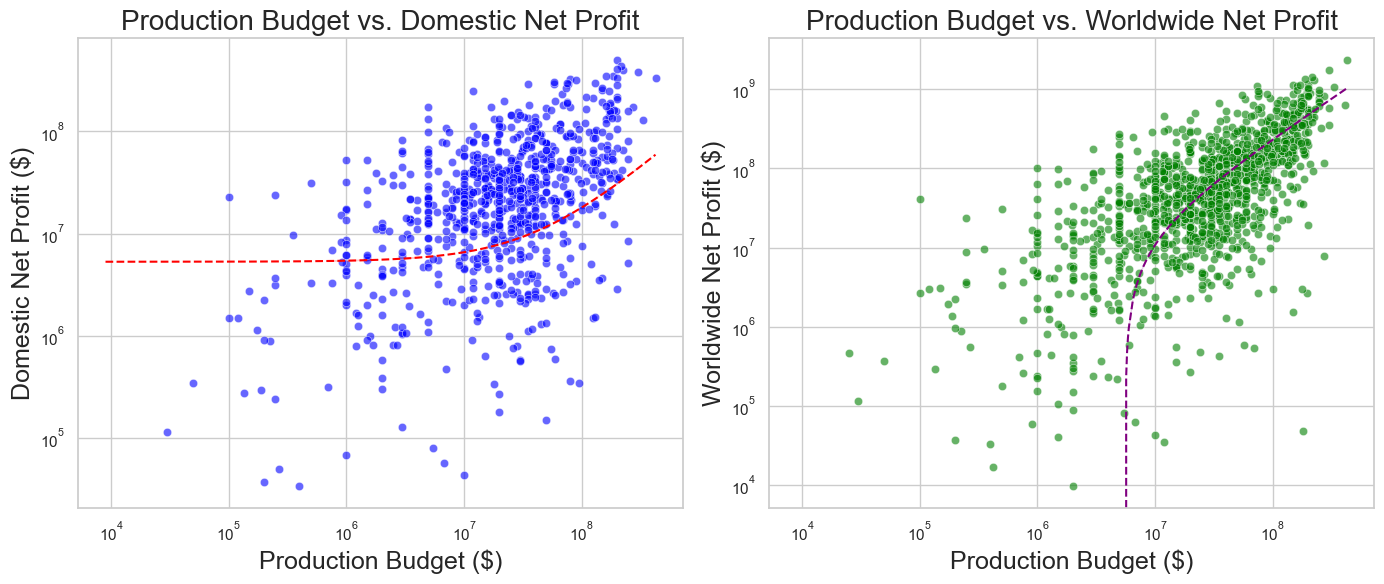

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set the style and size of the plot
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")

# Subplot for Domestic Net Profit
plt.subplot(1, 2, 1)
sns.scatterplot(x=production_budget, y=net_profit_domestic, color='blue', alpha=0.6)
sns.lineplot(x=production_budget, y=stats.linregress(production_budget, net_profit_domestic).intercept + 
             stats.linregress(production_budget, net_profit_domestic).slope * production_budget, color='red', linestyle='--')
plt.title('Production Budget vs. Domestic Net Profit', fontsize=20)
plt.xlabel('Production Budget ($)', fontsize=18)
plt.ylabel('Domestic Net Profit ($)', fontsize=18)
plt.xscale('log')
plt.yscale('log')

# Subplot for Worldwide Net Profit
plt.subplot(1, 2, 2)
sns.scatterplot(x=production_budget, y=net_profit_worldwide, color='green', alpha=0.6)
sns.lineplot(x=production_budget, y=stats.linregress(production_budget, net_profit_worldwide).intercept + 
             stats.linregress(production_budget, net_profit_worldwide).slope * production_budget, color='purple', linestyle='--')
plt.title('Production Budget vs. Worldwide Net Profit', fontsize=20)
plt.xlabel('Production Budget ($)', fontsize=18)
plt.ylabel('Worldwide Net Profit ($)',fontsize=18)
plt.xscale('log')
plt.yscale('log')

# Display the plot
plt.tight_layout()
plt.show()


## Linear Regression Analysis: Production Budget and Domestic Net Profit
To run a linear regression analysis for production budget and domestic net profit, we start by importing the Statsmodels library, which provides functions for conducting statistical tests. Next, we prepare the data for linear regression analysis by setting the independent variable and dependent variable. 'x = merged_df['production_budget']' sets the independent variable 'x' to the 'production_budget' column from the 'merged_df' DataFrame. The independent variable is the one we use to predict the dependent variable. 'y_domestic = merged_df['net_profit_domestic']' sets the dependent variable 'y_domestic' to the 'net_profit_domestic' column from the 'merged_df' DataFrame. The dependent variable is the one we want to predict. Next, we add a constant into our linear regression model. This allows the the intercept to fit the data more accurately, because without it the line would be forced to pass through the origin (0,0), which is unrealistic as most real-world scenarios are not likely to have a dependent variable be zero when all independent variables are zero. A constant also helps create more accurate statistical measures, which we will analyze once we run the linear regression, and makes it easier to compare models. To add a constant to the variable predictor, 'x', we do 'sm.add_constant(x)'. 

Now that our data is prepped, we are able to perform an Ordinary Least Squares (OLS) regression using the independent variable 'x' and the dependent variable 'y_domestic'. 'model_domestic = sm.OLS(y_domestic, x).fit()'. Adding 'fit()' estimates the regression coefficients. Linear regression and OLS regression are often used interchangeably, but linear regression is the overall model that describes the relationship between the dependent and independent variables, while OLS regression is a specific technique used to estimate the parameters of a linear regression model by minimizing the sum of squared residuals. 

We perform a Linear Regression analysis on production budget and worldwide net profit using the same logic as above. 

In [53]:
import statsmodels.api as sm # Importing the statsmodels library 
                             # for statistical modeling and 
                             # hypothesis testing, 
                             # using 'sm' as an alias

# Prepare data for regression analysis
# Set the independent variable (predictor)
x = merged_df['production_budget']

# Set the dependent variable (response)
y_domestic = merged_df['net_profit_domestic']

# Add constant term (intercept) to the predictor
x = sm.add_constant(x)

# Perform Ordinary Least Squares (OLS) regression
model_domestic = sm.OLS(y_domestic, x).fit()

# Display regression results summary
model_domestic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     net_profit_domestic   R-squared:                       0.014
Model:                             OLS   Adj. R-squared:                  0.014
Method:                  Least Squares   F-statistic:                     24.92
Date:                 Sun, 04 Aug 2024   Prob (F-statistic):           6.58e-07
Time:                         21:02:15   Log-Likelihood:                -33680.
No. Observations:                 1748   AIC:                         6.736e+04
Df Residuals:                     1746   BIC:                         6.737e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5.295e+06   1.71e+06      3.091      0.002    1.94e+06    8.66e+06
production_budget     0.1264      0.025      4.992      0.000       0.077       0.176
==============================================================================
Omnibus:                      988.533   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14465.617
Skew:                           2.340   Prob(JB):                         0.00
Kurtosis:                      16.293   Cond. No.                     8.59e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear Regression Results: Production Budget and Domestic Net Profit
Using the summary table provided from our calculation, we can highlight a few important attributes to conduct a solid interpretation of our linear regression analysis. 

R-squared = 0.014
* R-squared, ranged from 0 to 1, indicates the proportion of the variance in the dependent variable that is explained by the independent variable. The higher the R-squared, the better our model is at predicting domestic net profit based on production budget.
* This R-squared result suggests that only 1.4% of the variance in the domestic net profit is explained by the production budget. This is a very low R-squared, which suggests that the production budget does not strongly predict domestic net profit.

Adjusted R-squared = 0.014
* Adjusted R-squared modifies the R-squared value to account for the number of predictors in the model. If adjusted R-squared is lower than R-squared, it means that added predictors do not improve the models fit in a meaningful way.
* This adjusted R-squared result, which accounts for the number of predictors, confirms the explanatory power of the model, although low. Adjusted R-squared is the same as R-squared, which shows that adding more predictors will not enhance the model's fit. 

F-statistic = 24.92
Prob(F-statistic) = 6.58e-07
* The F-statistic tests overall significance of the regression model and its' associated p-value (Prob(F-statistic)) indicates whether the model is statistically significant as a whole. 
* Since Prob(F-statistic) is less than alpha (0.05), we can conclude that our F-statistic, and therefore our regression model, is statistically significant. A statistically significant F-statistic of 24.92 indicates that our model has some explanatory power.

Const (intercept) coef = 5.295e+06
Const (intercept) P>|1| = 0.002
Production Budget coef = 0.1264
Production Budget P>|1| = 0.00
* The const(intercept)is the value of the dependent variable (domestic net profit) when all independent variables (production budget) are zero. Although it's unlikely to have a production budget of zero, the intercept provides a starting point for the regression line
* With the intercept being 5.295e+06, that means if the production budget were zero, the model predicts the baseline domestic net profit would be 5.295 million dollars. Since the p-value for the intercept is 0.002, it is less than our alpha of 0.05, which indicates that the intercept is statistically significant. Since the null hypothesis for the intercept calculation is that the intercept is zero, it means there is strong evidence that the intercept is different from zero. 
* The Production Budget coef is the slope and represents the change in the dependent variable (domestic net profit) for a one-unit increase in the independent variable (production budget). It is the rate of change of the domestic net profit with respect to the changes in the production budget.
* A coefficient of 0.1264 means that for every additional dollar spent on the production budget, the domestic net profit increases by approximately 12.64 cents, holding all other factors constant. Since the p-value (0.00) is less than alpha (0.05), this  indicates that the coefficient is statistically significant, which means there is strong evidence that production budget has significant impact on the domestic net profit. 

Regression Equation
* Based on the given coefficients, the regression equation can be written as below:
* Domestic Net Profit = Intercept coef + Production Budget coef * Production Budget
* Domestic Net Profit = (5.295 * 10^6) + 0.1264 * Production Budget

Durbin-Watson: 1.848
* The Durbin-Watson statistic ranges from 0 to 4 and tests for the presence of autocorrelation in the residuals of a regression model. Ideally, we want the residuals in our model to be randomly distributed. Any patterns in the residuals from one observation to another is autocorrelation. If residuals are autocorrelated, it means there is some pattern or information in the data that our model has not captured, which can lead to overly optimistic or unreliable results. 
* With a Durbin-Watson value of 1.848, which means there is no significant autocorrelation in our model and implies that the residuals are independent. 

Jarque-Bera: 14465.617
* The Jarque-Bera test is used to check whether residuals (errors) of a regression model follow a normal distribution. This test's Null Hypothesis is that the residuals are normally distributed, while the Alternative Hypothesis is that the residuals are not normally distributed. A large test statistic indicates that the residuals deviate from normality and if the p-value is less than the chosen significance level (0.05), the null hypothesis is rejected, indicating that the residuals are not normally distributed. 
* Our Jarque-Bera test statistic value of 14465.617 is very high, which indicates that the residuals of our model do not follow a normal distribution. The p-value associated with our Jarque-Bera test is 0.00 is less than our alpha (0.05), which means we reject the null hypothesis of normality, confirming that the residuals are not normally distributed. 

Skew: 2.340
* Skewness measures the asymmetry of the distribution of the residuals. A skewness of 0 indicates a perfectly symmetrical distribution, while positive or negative values indicate right or left skew. A positive skew implies that there are more positive intervals than there are negative intervals, which means the model's predicted trends will tend to underestimate more often than they overestimate. A negative skew is the opposite; there are more negative intervals than positive intervals and the model's predicted trends will overestimate more often than they underestimate. 
* A skewness value of 2.340 indicates that the model's residuals are asymmetrically distributed and are positively skewed. This suggests that the model may not fully capture the relationship between the variables, which may be caused by the presence of outliers or a non-linear relationship.

Kurtosis: 16.293	
* Kurtosis describes the shape of a distribution's tails in relation to its overall shape. A value of 3 indicates a normal distribution. A value greater than 3 indicates a distribution with fatter tails and a sharper peak, which means it has more data points in the tails and fewer in the shoulders. This implies a higher probability of extreme values. A value of less than 3 indicates a distribution with thinner tails and a flatter peak, which means it has fewer data points in the tails and more in the shoulders. This implies fewer extreme values. 
* Our Kurtosis value of 16.293 indicates that the distribution of residuals have very fat tails and a shape peak, which means there are more extreme values (both low and high) compared to a normal distribution. This can greatly skew results and limit the reliability of our model. 

## Linear Regression Interpretation and Conclusion: Production Budget and Domestic Net Profit
As a whole, the regression model is statistically significant. Both the intercept and production budget coefficient are individually significant, which means there is a statistically significant relationship between production budget and domestic net profit. 

Despite the significance, the model suggests that the production budget only explains 1.4% of the variability in domestic net profit, as shown by our low R-squared value (0.014). 

A positive coefficient value of 0.1264 for production budget indicates that as the production budget increases, domestic net profit also tends to increase. However, the magnitude of this effect is very modest. 

Upon running our diagnostics checks, using Durbin-Watson, Jarque-Bera, Skew, and Kurtosis, we can see there are potential issues with our model, such as non-normality of residuals. This effect suggests our model is not very accurate and might not be capturing all the complexities of the data.

## Actionable Business Insights
While increasing production budget may lead to higher domestic net profits, the effect is relatively small and we should consider other strategies to maximize domestic net profit. If QMD+ Studios only releases movies domestically, we should distribute the production budget and consider other factors that may maximize domestic net profit, such as increased marketing budget or casting high-demand actors. 

## Linear Regression: Visual
To create a visual for our linear regression calculation, we will be utilizing two libraries we have already imported, matplotlib.pyplot and seaborn. On top of this, we import the 'statsmodels' library, which provides functions for estimating different statistical models and tests. Next, we copy the prepped data created for our linear regression calculation and bring them into the visual. Set the independent variable 'merged_df['production_budget']' as 'x', set the dependent variable 'merged_df['net_profit_domestic']' as 'y_domestic', add the constant (intercept) to the predictor 'x_with_const = sm.add_constant(x)', and perform the ordinary least squared regression using 'sm.OLS(y_domestic, x_with_const).fit()'. To plot the predicted values of 'y_domestic' based on 'x_with_const', we use 'y_pred = model_domestic.predict(x_with_const). Making sure the lengths of the predictor variable 'x' and predicted values 'y_pred' are the same before plotting is important for integrity and accuracy of the visual representation, so we ensure this by creating a sanity check to confirm they are the same lengths 'assert len(x) = len(y_pred)'. 

Next, we create a new 12x8 inch figure with 'plt.figure(figsize=(12, 8))' and set style of plot to white background 'sns.set(style='whitegrid')'. After this, we create a scatter plot of the data using 'plt.scatter(x, y_domestic..)' and add the parameters 'color='blue'', 'alpha=0.6', and 'label='Actual Data''. Now, we plot the regression line. We sort the 'x' values to ensure the regression line is plotted left to right by setting 'x.sort_values().index' as 'sorted_indices' and we ensure they are sorted in ascending order by setting 'x.loc[sorted_indices]' to 'x_sorted'. We do the same for 'y_pred', setting 'y_pred[sorted_indices]' as 'y_pred_sorted'. Then we plot the regression line with the sorted 'x' values and corresponding 'y_pred' values by doing 'plt.plot(x_sorted, y_pred_sorted..)' and add the parameters 'color="red"', "linestyle='--'", and "label='Fitted Line'". Next, we add labels to our axes and set out x and y axes to the logarithmic scale to better visualize the data using 'plt.xscale('log')' and 'plt.yscale('log')'. Following this, we display the coefficients by first retrieving the intercept and slope coefficients from the fitted model using 'intercept, slope = model_domestic.params'. We add text to the plot displaying the intercept and slope values using 'plt.text()', position the text relative to the axes using 'transform=plt.gca().TransAxes', align the text to the top left using "ha='left'" and "va='top'", select a font size 'fontsize=12', and add a semi-transparent white background to the text for better readability "bbox=dict(facecolor='white', alpha=0.5)'. Display the plot using 'plt.show().

We repeat this process for our worldwide net profit linear regression analysis. 

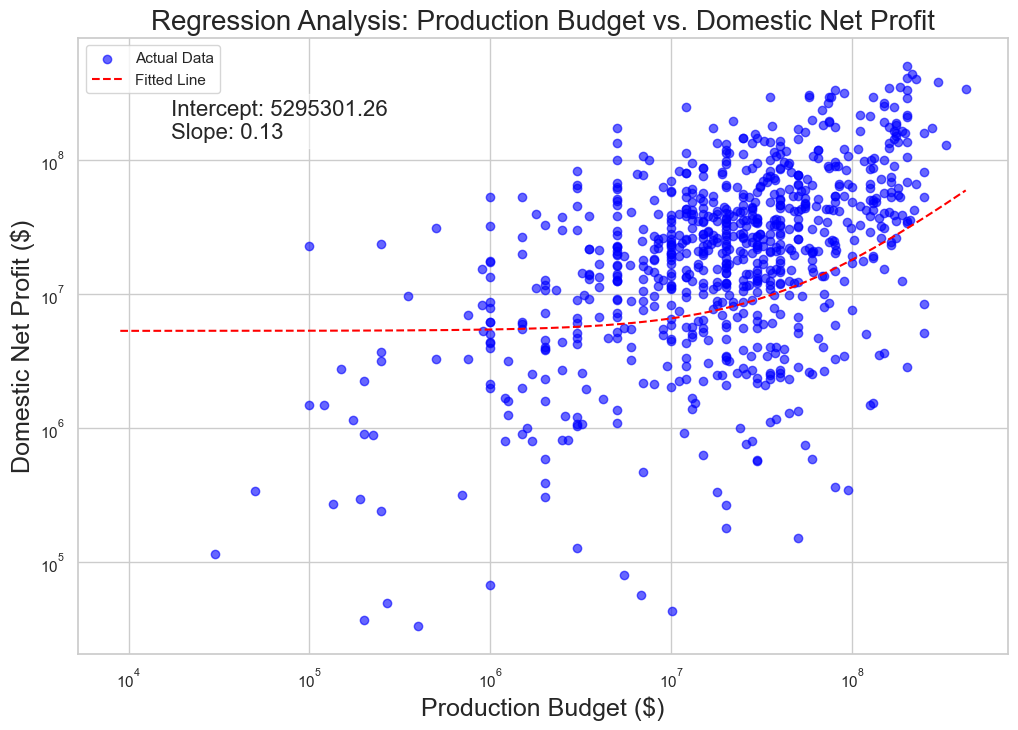

In [62]:
import statsmodels.api as sm # Importing the statsmodels library 
                             # for statistical modeling and 
                             # hypothesis testing, 
                             # using 'sm' as an alias

# Prepare data for regression analysis
x = merged_df['production_budget']
y_domestic = merged_df['net_profit_domestic']

# Add constant term (intercept) to the predictor
x_with_const = sm.add_constant(x)

# Perform Ordinary Least Squares (OLS) regression
model_domestic = sm.OLS(y_domestic, x_with_const).fit()

# Predict values using the regression model
y_pred = model_domestic.predict(x_with_const)

# Ensure x and y_pred have the same length for plotting
assert len(x) == len(y_pred), "x and y_pred must have the same length"

# Set the style and size of the plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Scatter plot of actual data
plt.scatter(x, y_domestic, color='blue', alpha=0.6, label='Actual Data')

# Plot the regression line
# Sort x values for a proper line plot
sorted_indices = x.sort_values().index
x_sorted = x.loc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.plot(x_sorted, y_pred_sorted, color='red', linestyle='--', label='Fitted Line')

# Add titles and labels
plt.title('Regression Analysis: Production Budget vs. Domestic Net Profit', fontsize=20)
plt.xlabel('Production Budget ($)', fontsize=18)
plt.ylabel('Domestic Net Profit ($)', fontsize=18)
plt.xscale('log')
plt.yscale('log')

# Add a legend
plt.legend()

# Display coefficients
intercept, slope = model_domestic.params
plt.text(0.1, 0.9, f'Intercept: {intercept:.2f}\nSlope: {slope:.2f}', 
         transform=plt.gca().transAxes, ha='left', va='top', fontsize=16, bbox=dict(facecolor='white', alpha=0.5))

# Display the plot
plt.show()


In [55]:
# Prepare data for regression analysis
# Set the independent variable (predictor)
x = merged_df['production_budget']

# Set the dependent variable (response)
y_worldwide = merged_df['net_profit_worldwide']

# Add constant term (intercept) to the predictor
x = sm.add_constant(x)

# Perform Ordinary Least Squares (OLS) regression
model_worldwide = sm.OLS(y_worldwide, x).fit()

# Display regression results summary
model_worldwide.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     net_profit_worldwide   R-squared:                       0.468
Model:                              OLS   Adj. R-squared:                  0.468
Method:                   Least Squares   F-statistic:                     1536.
Date:                  Sun, 04 Aug 2024   Prob (F-statistic):          1.41e-241
Time:                          21:02:16   Log-Likelihood:                -35245.
No. Observations:                  1748   AIC:                         7.049e+04
Df Residuals:                      1746   BIC:                         7.051e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.361e+07    4.2e+06     -3.245      0.001   -2.18e+07   -5.38e+06
production_budget     2.4299      0.062     39.193      0.000       2.308       2.551
==============================================================================
Omnibus:                      997.025   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19890.332
Skew:                           2.255   Prob(JB):                         0.00
Kurtosis:                      18.898   Cond. No.                     8.59e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear Regression Results: Production Budget and Worldwide Net Profit
Using the summary table provided from our calculation, we can highlight a few important attributes to conduct a solid interpretation of our linear regression analysis. 

R-squared = 0.468
* This R-squared value suggests that 46.8% of the variance in worldwide net profit is explained by the production budget. This indicates a moderate relationship between production budget and worldwide net profit, suggesting that the production budget has a significant impact on worldwide net profit.

Adjusted R-squared = 0.468
* With Adjusted R-squared being the same as the R-squared, the explanatory power of the model is confirmed. Since adjusted R-squared is not lower than R-squared, it suggests the current predictor (production budget) is adequate for the model and adding more predictors might not enhance the model's fit significantly. 

F-statistic = 1536
Prob(F-statistic) = 1.41e-241
* Since Prob(F-statistic) is less than alpha (0.05), we can conclude that our F-statistic, and therefore our regression model, is statistically significant. A statistically significant F-statistic of 1536 indicates the relationship between production budget and worldwide net profit is meaningful and has explanatory power. 

Const (intercept) coef = -1.361e+07	
Const (intercept) P>|1| = 0.001
Production Budget coef = 2.4299
Production Budget P>|1| = 0.00
* With the intercept being -1.36e+07, this means that if production budget were zero, the model predicts the baseline worldwide net profit would be -13.61 million dollars. With the p-value for the intercept being 0.001, it is less than our alpha (0.05), and indicates that the intercept is significant. Since the null hypothesis for the intercept calculation is that the intercept is zero, it means there is strong evidence that the intercept is different from zero. 
* A coefficient of 2.4299 means that for every dollar spent on production budget, the worldwide net profit increases by approximately 2.4299 dollars. The p-value is less than alpha(0.05), which indicates that the coefficient is statistically significant. This means there is strong evidence that the production budget has a significant impact on the worldwide net profit. 

Regression Equation
* Based on the given coefficients, the regression equation can be written as below:
* Worldwide Net Profit = Intercept coef + Production Budget coef * Production Budget
* Worldwide Net Profit = (-1.361 x 10^7) + 2.4299 * Production Budget


Durbin-Watson: 1.828
* A Durbin-Watson value of 1.828 indicates there is no significant autocorrelation in our model and implies that the residuals are independent. 

Jarque-Bera: 19890.332
* A Jarque-Bera test statistic of 19890.332 is very high, which indicates that the residuals of our model do not follow a normal distribution. The p-value associated with our Jarque-Bera test is 0.00 and is less than our alpha (0.05), which means we reject the null hypothesis of normality, confirming that residuals are not normally distributed. 

Skew: 2.255
* A skewness value of 2.255 indicates that the model's residuals are asymmetrically distributed and are positively skewed. This suggests that the model may not capture the relationship between the variables, which indicates the presence of outliers or a non-linear relationship. 

Kurtosis: 18.898
* A Kurtosis value of 18.898 indicates that the distribution of residuals have very fat tails and a sharp peak, which means there are extreme values on both the high end and low end, compared to a normal distribution. This can skew results and limit reliability of our model.

## Linear Regression Interpretation and Conclusion: Production Budget and Domestic Net Profit
Given the significant impact of production budget on worldwide net profit, QMD+ Studios should consider increasing production budget on films released worldwide in order to maximize overall profitability. The strong correlation with worldwide net profit suggests that focusing on global releases could yield higher returns on investment.

Although the model does indicate that a higher production budget leads to higher worldwide net profits, the presence of non-normal residuals and positive skewness highlights the need for further analysis. QMD+ Studios should investigate other factors that could influence net profit, such as marketing strategies, high value actors, and distribution channels. 

## Actionable Business Insights
While additional factors need to be researched to maximize profit and address the non-normal distribution of residuals, a higher production budget tends to enhance worldwide net profitability. If QMD+ Studios plans to release films globally, it should leverage the strong correlation between production budget and worldwide net profit by increasing the production budget for more substantial financial returns.

# Recommendation #3
## The Relationship Between Production Budget and Net Profit Using Pearson Correlation and Linear Regression Analysis

### Production Budget and Domestic Net Profit
The correlation between production budget and domestic net profit is relatively small, with only 1.4% of domestic net profit being explained by the production budget. Taking a look at our model's domestic net value equation.
'Domestic Net Profit = (5.295 * 10^6) + 0.1264 * Production Budget', we can see that if we hypothetically created a movie with a `$0` production budget, we would have a domestic net profit of 
`$5,295,000`. For each `$1` we spend on production budget, we increase our domestic net profit by about `$0.13`. This shows that for domestic films, we should minimize our production budget and put that money towards other factors, like marketing, talent, or distribution. 

### Production Budget and Worldwide Net Profit
The correlation between production budget and worldwide net profit is much higher at 46.8%, which means that 46.8% of worldwide net profit is explained by production budget. It is only a moderately strong correlation, but much stronger than the correlation between production budget and domestic net profit. Taking a look at our model's worldwide net profit equation, 
'Worldwide Net Profit = (-1.361 x 10^7) + 2.4299 * Production Budget', we can see that unlike domestic net profit, if we hypothetically had a production budget of `$0` and released a film worldwide, we would lose `$13,610,000`. However, with each `$1` spent on production budget, we would gain `$2.43` of profit, which is a much higher output than domestic net profit (`$0.13`). This shows that not only should we increase production budget on worldwide films, we need to have a minimum spend on production budget in order to break even. With both of these factors taken into account, QMD+ Studios should increase production budget when releasing worldwide films in order to leverage higher financial returns. 

To show how much more our production budget should be for worldwide films, we're going to use our model's equations to find when net profits for both domestic and worldwide films are equal. To do this, we set the equations equal to each other and solve for 'Production Budget'(P)
* (5.295 * 10^6) + 0.1264P = (-1.361 x 10^7) + 2.4299P
* 5,295,000 + 13,610,000 = 2.4299P - 0.1264P
* 18,905,000 = 2.3035P
* P = 18,905,000 / 2.3035
* P = 8,205,116.77

The production budget value at which domestic and worldwide net profits are equal is `$8,205,116.77`. To find the percentage increase in production budget for worldwide films relative to domestic films, we can compare the coefficients directly since they indicate the rate of change of net profit with respect to production budget:
* Percentage Increase = (2.4299/0.1264) * 100
* Percentage Increase = (19.22) * 100
* Percenntage increase = 1,922%

The production budget for worldwide films should be 1,922% (or 19.22 times) higher than the budget of domestic films to achieve similar financial impacts. This conclusion highlights the strong correlation between production budget and worldwide net profits, providing further evidence that QMD+ Studios should substantially increase production budget when releasing films worldwide. 

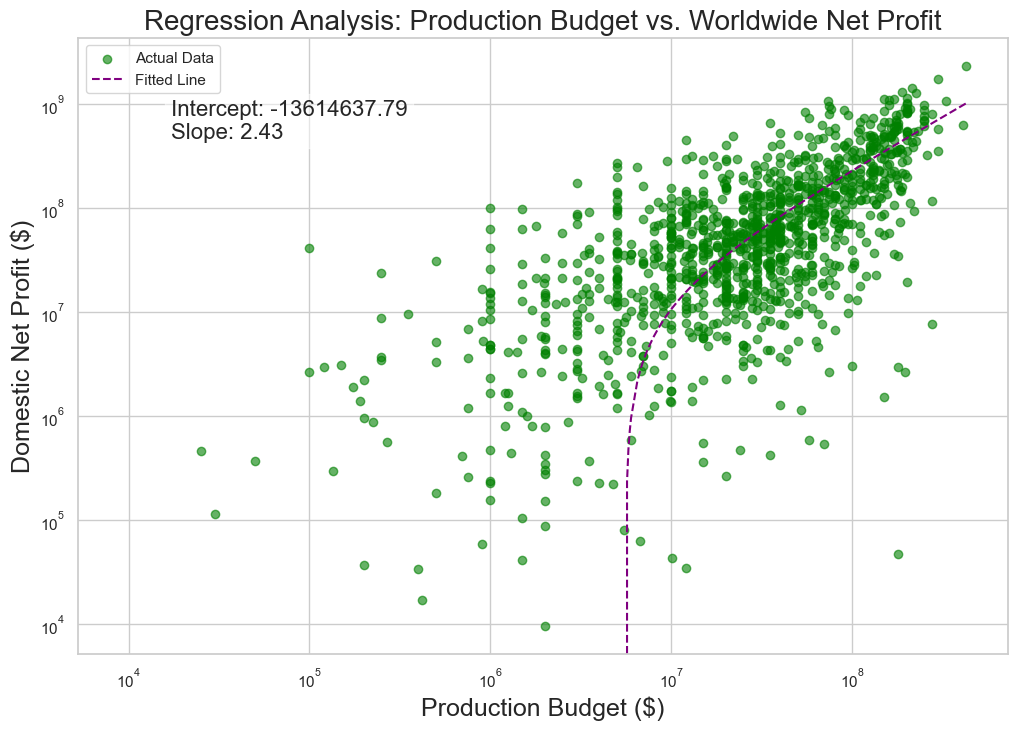

In [90]:
# Prepare data for regression analysis
x = merged_df['production_budget']
y_worldwide = merged_df['net_profit_worldwide']

# Add constant term (intercept) to the predictor
x_with_const = sm.add_constant(x)

# Perform Ordinary Least Squares (OLS) regression
model_worldwide = sm.OLS(y_worldwide, x_with_const).fit()

# Predict values using the regression model
y_pred = model_worldwide.predict(x_with_const)

# Ensure x and y_pred have the same length for plotting
assert len(x) == len(y_pred), "x and y_pred must have the same length"

# Set the style and size of the plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Scatter plot of actual data
plt.scatter(x, y_worldwide, color='green', alpha=0.6, label='Actual Data')

# Plot the regression line
# Sort x values for a proper line plot
sorted_indices = x.sort_values().index
x_sorted = x.loc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.plot(x_sorted, y_pred_sorted, color='purple', linestyle='--', label='Fitted Line')

# Add titles and labels
plt.title('Regression Analysis: Production Budget vs. Worldwide Net Profit', fontsize=20)
plt.xlabel('Production Budget ($)', fontsize=18)
plt.ylabel('Domestic Net Profit ($)', fontsize=18)
plt.xscale('log')
plt.yscale('log')

# Add a legend
plt.legend()

# Display coefficients
intercept, slope = model_worldwide.params
plt.text(0.1, 0.9, f'Intercept: {intercept:.2f}\nSlope: {slope:.2f}', 
         transform=plt.gca().transAxes, ha='left', va='top', fontsize=16, bbox=dict(facecolor='white', alpha=0.5))

# Display the plot
plt.show()


# **_Final Conclusion_**
To conclude, we have outlined our recommendations for QMD+ Studios to increase the likelihood of producing financially successful films.

## Recommendation #1: Most Profitable Genres
QMD+ Studios has the option to produce films either domestically (released only in the U.S.A.) or internationally (released worldwide). The average profitability of different genres varies based on the release strategy. Below are two lists, each containing the top 5 most profitable genres, on average, for domestic films and worldwide films. Whether QMD+ Studios decides to only release films domestically or worldwide, strategically focusing on the genres listed below will significantly increase the likelihood of financial success.

#### Domestic Films
* 1. **Animation**
    * Average Net Profit: `$38,423,631.04` 
<br><br>
* 2. **Family**
    * Average Net Profit: `$24,041,303.55`
<br><br>
* 3. **Music**
    * Average Net Profit: `$19,102,865.44`
<br><br>
* 4. **Comedy**
    * Average Net Profit: `$17,848,302.31`
<br><br>
* 5. **Adventure**
    * Average Net Profit: `$15,687,607.92`
<br><br>   
#### Worldwide Films
* 1. **Adventure**
    * Average Net Profit: `$254,963,195.75`
<br><br>
* 2. **Animation**
    * Average Net Profit: `$245,873,240.63`
<br><br>
* 3. **Fantasy**
    * Average Net Profit: `$215,092,359.90`
<br><br>
* 4. **Family**
    * Average Net Profit: `$195,854,689.64`
<br><br>
* 5. **Science Fiction**
    * Average Net Profit: `$186,979,401.78`
<br><br>  


## Recommendation #2: Highest Rated Directors and Writers
Another way to increase the chances of a successful film is to hire accomplished directors and writers with a track record of highly rated films. Because of QMD has had such great success as a technology company, QMD+ Studios has ample resources to hire the best talent to write and direct our films. Based on IMDb ratings and votes, below are two lists: the top 10 highest-rated directors and the top 10 highest-rated writers. Hiring any of these directors and writers to our film production team will significantly boost film quality, enhancing the likelihood of commercial success and profitability. 

### Directors
* 1. **Rodney Rothman**
    * Average Rating: `8.50`
    * Vote Count: `210,869.00`
<br><br>
* 2. **Bob Persichetti**
    * Average Rating: `8.50`
    * Vote Count: `210,869.00`
<br><br>
* 3. **Christopher Nolan**
    * Average Rating: `8.44`
    * Vote Count: `1,299,334.00`
<br><br>
* 4. **Anthony Russo**
    * Average Rating: `8.25`
    * Vote Count: `666,252.00`
<br><br>
* 5. **Joe Russo**
    * Average Rating: `8.25`
    * Vote Count: `666,252.00`
<br><br>
* 6. **Mel Gibson**
    * Average Rating: `8.10`
    * Vote Count: `366,904.00`
<br><br>
* 7. **Damián Szifron**
    * Average Rating: `8.10`
    * Vote Count: `151,123.00`
<br><br>
* 8. **Robert Eggers**
    * Average Rating: `8.07`
    * Vote Count: `154,278.00`
<br><br>
* 9. **Rajkumar Hirani**
    * Average Rating: `8.02`
    * Vote Count: `138,012.00`
<br><br>
* 10. **Stephen Chbosky**
    * Average Rating: `8.00`
    * Vote Count: `422,671.00`
<br><br> 

### Writers
* 1. **Quentin Tarantino**
    * Average Rating: `8.68`
    * Vote Count: `1,211,405.00`
<br><br>
* 2. **Jonathan Nolan**
    * Average Rating: `8.50`
    * Vote Count: `1,299,334.00`
<br><br>
* 3. **Philippe Pozzo di Borgo**
    * Average Rating: `8.50`
    * Vote Count: `677,343.00`
<br><br>
* 4. **Tony Kushner**
    * Average Rating: `8.43`
    * Vote Count: `228,701.00`
<br><br>
* 5. **Jason Katz**
    * Average Rating: `8.40`
    * Vote Count: `277,194.00`
<br><br>
* 6. **Brian Hayes Currie**
    * Average Rating: `8.30`
    * Vote Count: `204,972.00`
<br><br>
* 7. **Denis Villeneuve**
    * Average Rating: `8.30`
    * Vote Count: `124,156.00`
<br><br>
* 8. **Wajdi Mouawad**
    * Average Rating: `8.30`
    * Vote Count: `124,156.00`
<br><br>
* 9. **Jim Starlin**
    * Average Rating: `8.24`
    * Vote Count: `948,394.00`
<br><br>
* 10. **Jordan Belfort**
    * Average Rating: `8.20`
    * Vote Count: `1,035,358.00`
<br><br> 

## Recommendation #3: Optimizing Production Budgets for Maximum Profit
The last recommendation we have for QMD+ Studios is based on analyzing the correlation and conducting a linear regression to see if there is a useful relationship between production budget and net profit. For both domestic and worldwide films, we found that there is a statistically significant positive relationship between production budget and net profit. In  other words, an increase in production budget leads to an increase in net profit. However, the strength of this relationship varies between domestic and worldwide films, and the optimal production budget depends on the target market.

### Domestic Film Production Budget
* **Minimize Production Budget for Domestic Films**
<br><br> 
* Based on our calculations, although production budget and domestic net profit have a statistically significant positive relationship, it is very weak. Therefore, production budgets for domestic films should be minimized and the available financing should be put towards other factors to maximize net profit, such as increased marketing budget, casting high-demand actors, or expanded distribution channels.
<br><br> 
### Worldwide Film Production Budget
* **Maximize Production Budget for Worldwide Films**
<br><br> 
* Based on our calculations, production budget and worldwide net profit have a moderate to strong relationship. 46.8% of worldwide net profit is explained by the production budget, compared to the 1.4% of domestic net profit explained by the production budget. Our recommendation is to maximize production budget in order to maximize net profit for worldwide films, while still putting some money towards marketing, talent, and distribution. According to assessment, a hypothetical production budget of `$0` for a domestic film would lead to an average of `$5,295,000` profit, while a hypothetical budget of `$0` for a worldwide film would lead to an average loss of `$13,610,000`. Although increasing production budget for worldwide films will create higher net profit, it is necessary to have atleast a moderate production budget in order to break-even. Our analysis shows that production budget for worldwide films should be 1,922% (or 19.22 times) higher than production budget for domestic films. 